<a href="https://colab.research.google.com/github/kkrusere/EV_Market-Analysis-and-Consumer-Behavior/blob/main/EV-Market_Analysis-%26-Consumer_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<center> Electric Vehicle (EV) Market Analysis and Consumer Behavior </center>**

<center> <em>Understanding the EV Market Share, Growth & Trends, Vehicle Components' Supply Chain, Charging Infrastructure, Consumer Preferences, Pros & Cons, and Adoption Barriers</em></center>

<center><img src="https://github.com/kkrusere/EV_Market-Analysis-and-Consumer-Behavior/blob/main/assets/ev-eda-analysis.png?raw=1" width=600/></center>


##### **Introduction**

The electric vehicle (EV) market has experienced significant growth over the last decade, driven by environmental concerns, government policies, and advances in technology. However, the widespread adoption of EVs faces several challenges, including supply chain constraints, charging infrastructure limitations, and consumer reluctance. This project aims to provide a comprehensive analysis of the current EV market, supply chain dynamics, and consumer behaviors while presenting a neutral view of the advantages and disadvantages of EV adoption.



##### **Objectives:**
1. **EV Market Trends (2015-2030):** Analyze global EV market share and growth patterns from 2015 to 2030.
2. **Supply Chain Analysis:** Investigate the EV supply chain with a focus on critical components such as batteries and semiconductors, and highlight existing bottlenecks and projected future challenges over the period.
3. **Charging Infrastructure Growth (2015-2030):** Evaluate the growth and development of EV charging infrastructure during this period, identifying geographic disparities and potential gaps in future infrastructure needs.
4. **Consumer Preferences:** Assess evolving consumer preferences and barriers to adoption, such as cost, range anxiety, and environmental concerns, examining shifts from 2015 to projected trends in 2030.
5. **Pros & Cons:** Provide a balanced analysis of the advantages (e.g., environmental sustainability) and disadvantages (e.g., high initial costs) of EV adoption, considering both past trends and future projections.
6. **Prescriptive Insights (2015-2030):** Offer data-driven recommendations for policymakers and industry stakeholders to overcome key barriers to adoption and support the continued growth of the EV market through to 2030.


This notebook will apply a combination of descriptive, predictive, prescriptive, and geospatial analysis to achieve the outlined objectives. Data is drawn from industry reports, market research, and publicly available sources. The aim is to provide data-driven insights that can assist stakeholders—including governments, manufacturers, and consumers—in understanding the current state of the EV market and identifying potential strategies for its continued development.

In [ ]:
from google.colab import drive, userdata
import os
import json
#mounting google drive
drive.mount('/content/drive')

########################################

#changing the working directory
os.chdir("/content/drive/MyDrive/EV_Data")

!pwd

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/EV_Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# For interactive plots
%matplotlib inline

# Set seaborn style
sns.set(style='whitegrid')

The dataset in we are going to look at is sourced from the  [IEA Global EV Data 2024](https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer)
, provides a comprehensive view of the electric vehicle (EV) landscape across various regions and timeframes. It combines historical data with projections to analyze trends in EV stock, sales, charging infrastructure, and energy demand.

**Key elements include:**

> - **Regions:** Countries and global segments where data is captured.
> - **Category:** Historical data and projections (e.g., STEPS and APS).
> - **Parameters:** EV-related metrics like sales share, stock share, electricity demand, and oil displacement.
> - **Modes:** Vehicle types, including cars, buses, vans, and trucks.
> - **Powertrain:** Types of powertrains, including BEV (Battery Electric Vehicle), PHEV (Plug-in Hybrid Electric Vehicle), and others.
> - **Years:** Spanning from 2010 to 2035, highlighting both past data and future projections.
> - **Units:** Measurement types, ranging from percentage to vehicles, charging points, and energy consumption (GWh, million barrels per day).

This dataset serves as a foundational tool for analyzing global EV trends, market growth, energy demands, and the transition to electric mobility up to 2035.

##### Loading the data

In [ ]:
df_ev_data = pd.read_csv('IEA Global EV Data 2024.csv')
df_ev_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [ ]:
# Below printed  out unique values in the column 'region','category','parameter',	'mode', 'powertrain'	'year','unit'

print("Unique values in 'region':", df_ev_data['region'].unique())
print("Unique values in 'category':", df_ev_data['category'].unique())
print("Unique values in 'parameter':", df_ev_data['parameter'].unique())
print("Unique values in 'mode':", df_ev_data['mode'].unique())
print("Unique values in 'powertrain':", df_ev_data['powertrain'].unique())
print("Unique values in 'year':", df_ev_data['year'].unique())
print("Unique values in 'unit':", df_ev_data['unit'].unique())

Unique values in 'region': ['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']
Unique values in 'category': ['Historical' 'Projection-STEPS' 'Projection-APS']
Unique values in 'parameter': ['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']
Unique values in 'mode': ['Cars' 'EV' 'Buses' 'Vans' 'Trucks']
Unique values in 'powertrain': ['EV' 'BEV' 'PHEV' 'Pu

In [ ]:
df_ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


1.1 Handling Missing Values
 - First, we check for missing values in the DataFrame:

In [ ]:
# Check for missing values
print(df_ev_data.isnull().sum())


region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64


1.2 Standardizing Text Data

 - Ensure consistency in text data by converting all text to lowercase and stripping whitespace:

In [ ]:
# Convert text columns to lowercase and strip whitespace
text_columns = ['region', 'category', 'parameter', 'mode', 'powertrain', 'unit']
for col in text_columns:
    df_ev_data[col] = df_ev_data[col].str.lower().str.strip()


1.3 Correcting Inconsistencies in 'region'

 - Check for inconsistent region names:

In [ ]:
# For example, standardizing country names
df_ev_data['region'] = df_ev_data['region'].replace({
    'usa': 'united states',
    'eu27': 'european union',
    'turkiye': 'turkey',
})


1.4 Converting Data Types
 - Ensuring that numeric columns are correctly typed:

In [ ]:
# Convert 'year' to integer
df_ev_data['year'] = df_ev_data['year'].astype(int)

# 'value' to float64
df_ev_data['value'] = df_ev_data['value'].astype(float)


1.5 Handling Duplicates

 - Checking and removing duplicate rows:

In [ ]:
# Checking for duplicates
duplicate_rows = df_ev_data[df_ev_data.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

# Remove duplicates
df_ev_data = df_ev_data.drop_duplicates()


Number of duplicate rows: 0


In [ ]:
# renaming columns
df_ev_data.rename(columns={
    'region': 'Region',
    'category': 'Category',
    'parameter': 'Parameter',
    'mode': 'Mode',
    'powertrain': 'Powertrain',
    'year': 'Year',
    'unit': 'Unit',
    'value': 'Value'
}, inplace=True)


1.6 Handling Units and Conversions

 - Ensure that units are consistent for each parameter:

In [ ]:
# # Check units for each parameter
# print(df_ev_data.groupby(['Parameter', 'Unit']).size())

# # If necessary, convert units to standardize (e.g., million to units)
# # Example for 'Oil displacement, million lge':
# df_ev_data.loc[df_ev_data['Unit'] == 'oil displacement, million lge', 'Value'] *= 1_000_000
# df_ev_data.loc[df_ev_data['Unit'] == 'oil displacement, million lge', 'Unit'] = 'oil displacement, lge'


1.7 Pivoting Data for Analysis

 - Reshape the DataFrame to facilitate analysis:

In [ ]:
# Pivoting the data to have years as rows and regions as columns for a specific parameter
pivot_table = df_ev_data.pivot_table(
    index='Year',
    columns='Region',
    values='Value',
    aggfunc='sum'
)


In [ ]:
# droping rows
powertrain_exclude = ['ev', 'publicly available fast', 'publicly available slow', 'fcev']

for value in powertrain_exclude:
  df_ev_data = df_ev_data[df_ev_data.Powertrain != value]

df_ev_data = df_ev_data[df_ev_data.Mode != 'ev']

In [ ]:
# Fixing the typo in the 'Unit' column
# There is a typo in the Unit column: 'milion barrels per day' should be 'million barrels per day'
df_ev_data['Unit'] = df_ev_data['Unit'].replace({
    'milion barrels per day': 'million barrels per day'
})

# Renaming removing 'rest of the world'
df_ev_data = df_ev_data[df_ev_data['Region'] != 'world']

# Keeping relevant parameters
# For EV market share and trends analysis, we'll focus on  key parameters ev sales, ev stock, ev sales share, and ev stock share.
relevant_parameters = ['ev sales', 'ev stock', 'ev sales share', 'ev stock share']
df_ev_data = df_ev_data[df_ev_data['Parameter'].isin(relevant_parameters)]



In [ ]:
# Filter data for years between 2015 and 2030 (inclusive)
df_ev_data = df_ev_data[(df_ev_data['Year'] >= 2015) & (df_ev_data['Year'] <= 2030)]


In [ ]:
df_ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3868 entries, 22 to 11312
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Region      3868 non-null   object 
 1   Category    3868 non-null   object 
 2   Parameter   3868 non-null   object 
 3   Mode        3868 non-null   object 
 4   Powertrain  3868 non-null   object 
 5   Year        3868 non-null   int64  
 6   Unit        3868 non-null   object 
 7   Value       3868 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 272.0+ KB


In [ ]:
print("Unique values in 'region':", df_ev_data['Region'].unique())
print("Unique values in 'category':", df_ev_data['Category'].unique())
print("Unique values in 'parameter':", df_ev_data['Parameter'].unique())
print("Unique values in 'mode':", df_ev_data['Mode'].unique())
print("Unique values in 'powertrain':", df_ev_data['Powertrain'].unique())
print("Unique values in 'year':", df_ev_data['Year'].unique())
print("Unique values in 'unit':", df_ev_data['Unit'].unique())

Unique values in 'region': ['australia' 'austria' 'belgium' 'brazil' 'bulgaria' 'canada' 'chile'
 'china' 'colombia' 'costa rica' 'croatia' 'cyprus' 'czech republic'
 'denmark' 'estonia' 'european union' 'europe' 'finland' 'france'
 'germany' 'greece' 'hungary' 'iceland' 'india' 'ireland' 'israel' 'italy'
 'japan' 'korea' 'latvia' 'lithuania' 'luxembourg' 'mexico' 'netherlands'
 'new zealand' 'norway' 'poland' 'portugal' 'rest of the world' 'romania'
 'seychelles' 'slovakia' 'slovenia' 'south africa' 'spain' 'sweden'
 'switzerland' 'turkey' 'united arab emirates' 'united kingdom'
 'united states']
Unique values in 'category': ['historical' 'projection-aps' 'projection-steps']
Unique values in 'parameter': ['ev sales' 'ev stock']
Unique values in 'mode': ['cars' 'trucks' 'vans' 'buses']
Unique values in 'powertrain': ['phev' 'bev']
Unique values in 'year': [2015 2016 2017 2018 2019 2020 2021 2022 2023 2025 2030]
Unique values in 'unit': ['vehicles']


#### **Exploratory Data Analysis (EDA)**

In [ ]:
# EV Sales
ev_sales = df_ev_data[df_ev_data['Parameter'] == 'ev sales']
# EV Stock
ev_stock = df_ev_data[df_ev_data['Parameter'] == 'ev stock']

**Distribution of EV Sales and Stock** : Analyzing the distribution of EV sales and stock values.

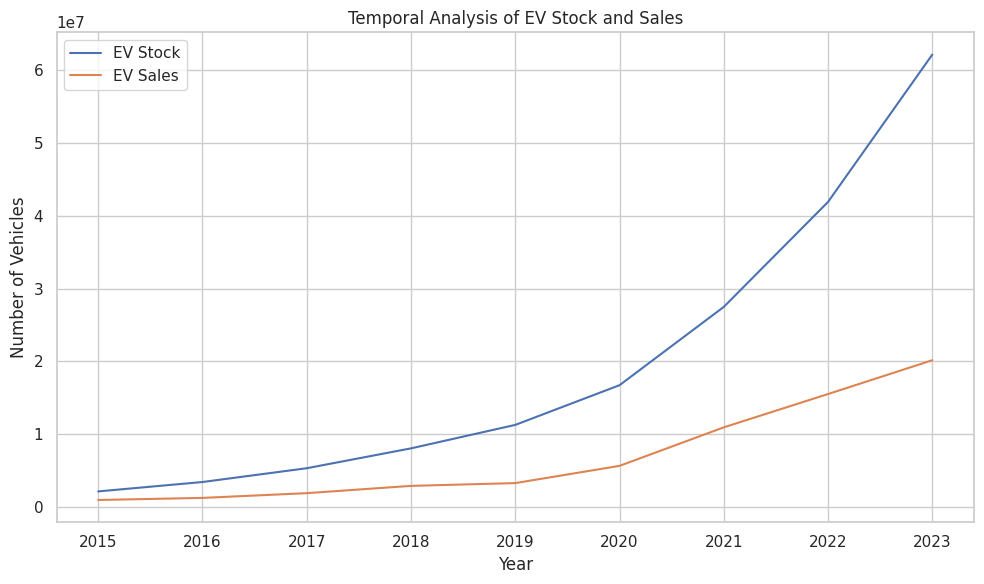

In [ ]:
# Filtering data for EV stock and sales
ev_stock_hist = df_ev_data[(df_ev_data['Parameter'] == 'ev stock') & (df_ev_data['Category'] == 'historical')]
ev_sales_hist = df_ev_data[(df_ev_data['Parameter'] == 'ev sales') & (df_ev_data['Category'] == 'historical')]

# Grouping data by year and calculate total EV stock and sales for each year
ev_stock_yearly = ev_stock_hist.groupby('Year')['Value'].sum()
ev_sales_yearly = ev_sales_hist.groupby('Year')['Value'].sum()


plt.figure(figsize=(10, 6))

plt.plot(ev_stock_yearly.index, ev_stock_yearly.values, label='EV Stock')
plt.plot(ev_sales_yearly.index, ev_sales_yearly.values, label='EV Sales')

plt.title('Temporal Analysis of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)

plt.xticks(ev_stock_yearly.index)
plt.tight_layout()
plt.show()



The total number of EVs on the road, or the cumulative stock, shows significant growth from 2015 to 2023. Growth appears to be exponential, with a sharp increase especially from 2020 onwards. In 2023, the total EV stock crosses 100 million vehicles, showing a rapid global adoption of EVs in the past few years. EV sales are increasing steadily but at a slower rate than the stock accumulation. Between 2015 and 2019, the growth in sales is moderate. From 2020 onward, sales exhibit stronger growth, although the slope is still less steep compared to the stock (which might be an indicator of the adoption rate).The year 2023 shows the highest sales figure in the period, with the sales approaching 40 million units. The EV market is experiencing rapid growth, with both stock and sales increasing significantly.
The rate of growth is accelerating, indicating a strong momentum in the market. This trend is likely to continue in the foreseeable future, though external factors could influence the growth trajectory. we will take a look at the


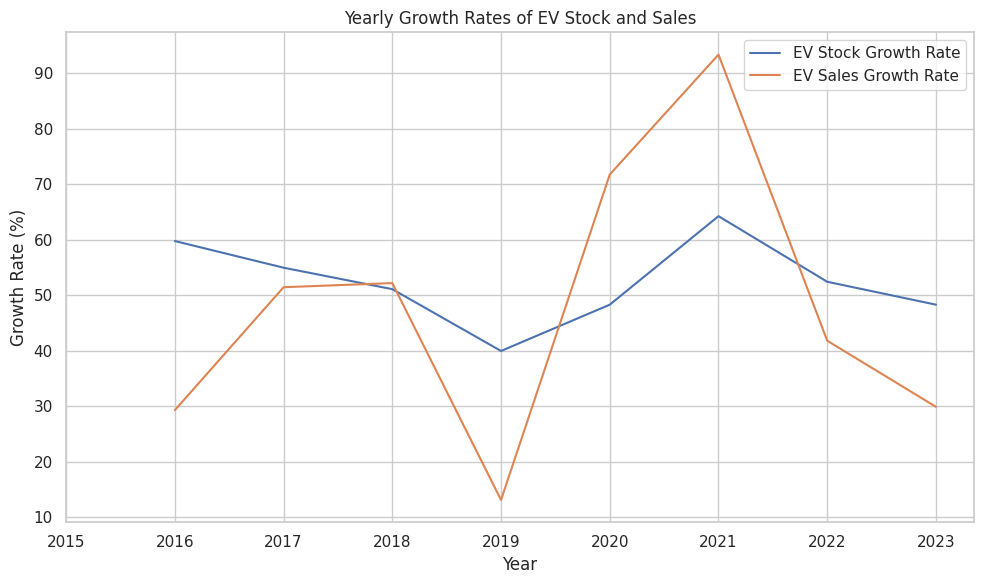

In [ ]:
# Yearly Growth Rates
ev_stock_yearly_growth = ev_stock_yearly.pct_change() * 100
ev_sales_yearly_growth = ev_sales_yearly.pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(ev_stock_yearly_growth.index, ev_stock_yearly_growth.values, label='EV Stock Growth Rate')
plt.plot(ev_sales_yearly_growth.index, ev_sales_yearly_growth.values, label='EV Sales Growth Rate')
plt.title('Yearly Growth Rates of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(ev_stock_yearly_growth.index)
plt.tight_layout()
plt.show()

Side-by-Side YoY Growth Plots for EV Sales and EV Stock

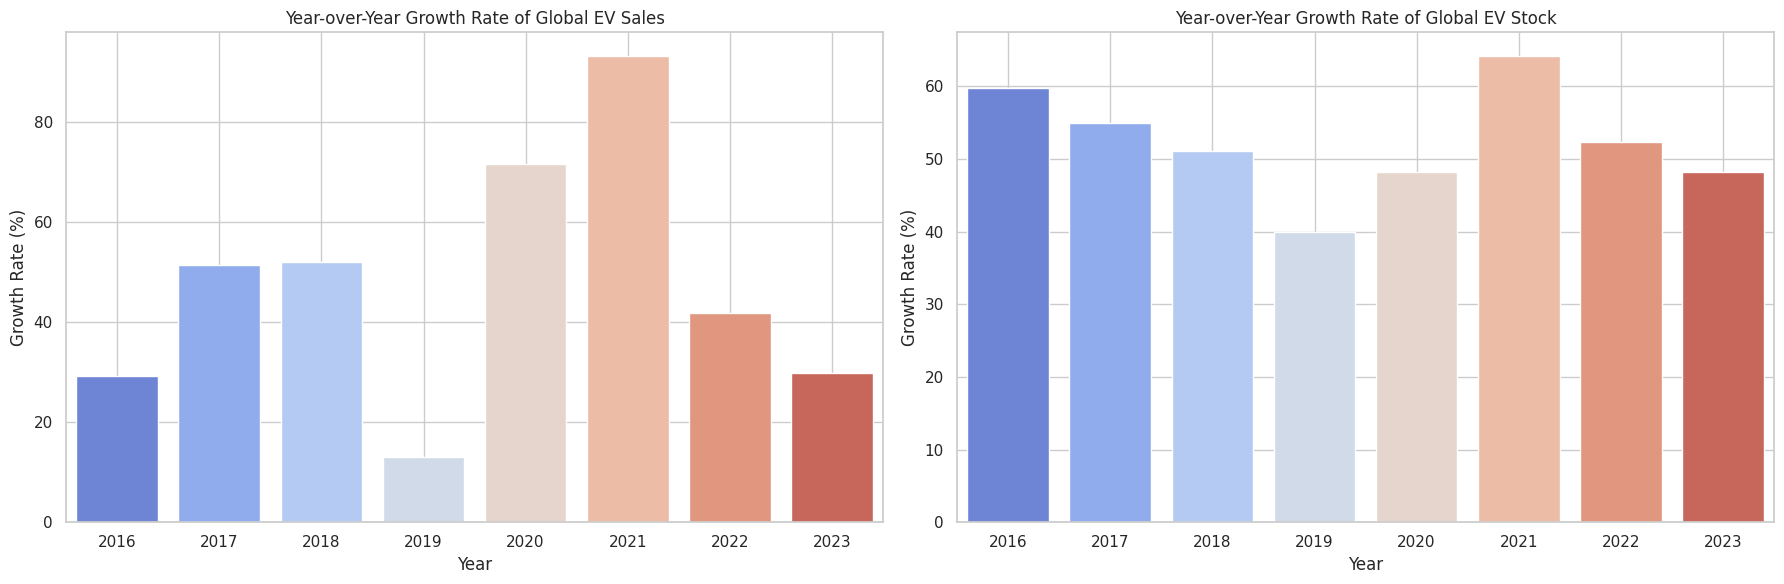

In [ ]:
# EV Sales: Calculate YoY Growth
historical_sales_yearly = ev_sales_hist.groupby('Year')['Value'].sum().reset_index()
historical_sales_yearly['YoY_Growth'] = historical_sales_yearly['Value'].pct_change() * 100

# EV Stock: Calculate YoY Growth
historical_stock_yearly = ev_stock_hist.groupby('Year')['Value'].sum().reset_index()
historical_stock_yearly['YoY_Growth'] = historical_stock_yearly['Value'].pct_change() * 100

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Plot for EV Sales YoY Growth
sns.barplot(data=historical_sales_yearly.dropna(), x='Year', y='YoY_Growth', palette='coolwarm', ax=ax1)
ax1.set_title('Year-over-Year Growth Rate of Global EV Sales')
ax1.set_xlabel('Year')
ax1.set_ylabel('Growth Rate (%)')
ax1.grid(True)

# Plot for EV Stock YoY Growth
sns.barplot(data=historical_stock_yearly.dropna(), x='Year', y='YoY_Growth', palette='coolwarm', ax=ax2)
ax2.set_title('Year-over-Year Growth Rate of Global EV Stock')
ax2.set_xlabel('Year')
ax2.set_ylabel('Growth Rate (%)')
ax2.grid(True)


plt.tight_layout()
plt.show()

The above chart contains two bar charts displaying the year-over-year growth rates for global electric vehicle (EV) sales and EV stock from 2016 to 2023. For the Year-over-Year Growth Rate of Global EV Sales (Left Chart), the growth rate fluctuates significantly across the year. **2016-2018**, there is a steady increase in the growth rate is observed, with growth rates between 40% and 60%. The **2019** growth rate drops significantly to a low point, indicating a potential slowdown in sales growth during that year. there is a recovery in **2020** is evident as the growth rate rises back up. There is a peak growth rate in **2021**, with sales increasing by over 100%, indicating a massive spike in global EV sales. This could be attributed to several factors like increased consumer demand, government incentives, and an expansion in available EV models, and maybe Covid19 as the world was emerging/recovering from the pandemic. **2022-2023** has the growth rate decline but remains substantial, around 30%-40%. Though it's a drop from 2021's peak, it still reflects strong market growth.

Year-over-Year Growth Rate of Global EV Stock (Right Chart), has **2016-2018** with a growth rate of EV stock being consistently high, around 50%-60%. There's a noticeable decline in stock growth in **2019**, dipping to around 30%, possibly reflecting the slower sales growth observed in the left chart for the same year. The stock growth recovers in the **2020-2021**. The growth rate moderates, settling between **20%-30%**, maybe reflecting a stabilization as the as the world recovers from Covid19 and EV market matures. Even though the stock continues to grow, it does so at a slower pace compared to the earlier years.

Projection Analysis
**Comparing Historical Data with Projections:** Separate historical data and projections for analysis.

`"Projection-STEPS"` and `"Projection-APS"`

STEPS - Stated Policies Scenario <br>
APS - Announced Pledges Scenario



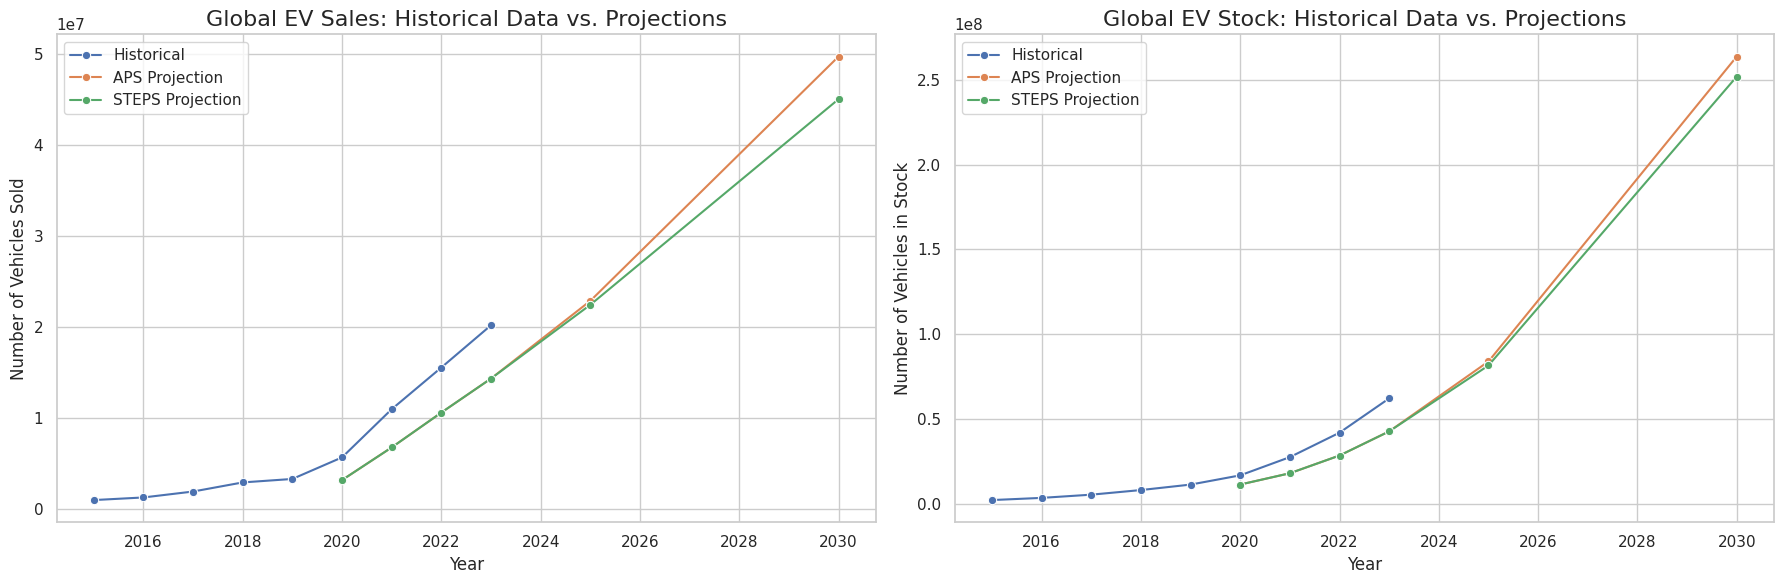

In [ ]:
# Filter historical and projection data for EV Sales
historical_sales = ev_sales[ev_sales['Category'] == 'historical']
aps_projections_sales = ev_sales[ev_sales['Category'] == 'projection-aps']
steps_projections_sales = ev_sales[ev_sales['Category'] == 'projection-steps']

# Filter historical and projection data for EV Stock
historical_stock = ev_stock[ev_stock['Category'] == 'historical']
aps_projections_stock = ev_stock[ev_stock['Category'] == 'projection-aps']
steps_projections_stock = ev_stock[ev_stock['Category'] == 'projection-steps']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Plot for EV Sales: Historical and Projections
sns.lineplot(data=historical_sales.groupby('Year')['Value'].sum().reset_index(),
             x='Year', y='Value', label='Historical', marker='o', ax=ax1)
sns.lineplot(data=aps_projections_sales.groupby('Year')['Value'].sum().reset_index(),
             x='Year', y='Value', label='APS Projection', marker='o', ax=ax1)
sns.lineplot(data=steps_projections_sales.groupby('Year')['Value'].sum().reset_index(),
             x='Year', y='Value', label='STEPS Projection', marker='o', ax=ax1)

# Configure plot titles and labels for EV Sales
ax1.set_title('Global EV Sales: Historical Data vs. Projections', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Vehicles Sold', fontsize=12)
ax1.legend()
ax1.grid(True)

# Plot for EV Stock: Historical and Projections
sns.lineplot(data=historical_stock.groupby('Year')['Value'].sum().reset_index(), x='Year', y='Value', label='Historical', marker='o', ax=ax2)
sns.lineplot(data=aps_projections_stock.groupby('Year')['Value'].sum().reset_index(), x='Year', y='Value', label='APS Projection', marker='o', ax=ax2)
sns.lineplot(data=steps_projections_stock.groupby('Year')['Value'].sum().reset_index(), x='Year', y='Value', label='STEPS Projection', marker='o', ax=ax2)

# Configure plot titles and labels for EV Stock
ax2.set_title('Global EV Stock: Historical Data vs. Projections', fontsize=16)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Number of Vehicles in Stock', fontsize=12)
ax2.legend()
ax2.grid(True)


plt.tight_layout()
plt.show()


The above chart contains two line charts comparing historical data versus projections for global EV sales (left chart) and global EV stock (right chart) from 2015 to 2030. The projections are based on two different scenarios: APS (orange line) and STEPS (green line).


**Left Chart**, Sales exhibit a clear upward trend, with significant growth post-2020, reflecting increased adoption. APS Projection (orange line), APS stands for "Announced Pledges Scenario," and it projects aggressive growth, with global EV sales surpassing 8 million vehicles by 2030. This projection indicates a scenario where global commitments and pledges for sustainability and EV adoption are fully realized. STEPS Projection (green line), STEPS stands for "Stated Policies Scenario," and it projects slightly slower growth, with global EV sales reaching approximately 6 million vehicles by 2030. This scenario assumes that the current policies in place (but not necessarily aggressive new pledges) will drive EV adoption forward.

**Right Chart**, The total EV stock shows consistent growth, especially post-2020, where the cumulative number of EVs on the road increased significantly. APS Projection (orange line), Under this scenario, global EV stock is projected to surpass 500 million vehicles by 2030, indicating rapid adoption and cumulative growth. STEPS Projection (green line), STEPS projection shows a slightly slower growth trajectory, reaching approximately 400 million vehicles by 2030. This projection reflects more conservative estimates based on current policies without additional aggressive commitments.

**Global EV Sales by Powertrain: Historical Data vs. Projections**
- Show global EV sales for each powertrain type, stratified by the projection scenarios (historical, APS, and STEPS).
- Visually comparing how BEV and PHEV sales contribute to the overall trends in each scenario.

In [ ]:
# Combine all datasets
historical_sales['Projection'] = 'Historical'
aps_projections_sales['Projection'] = 'APS Projection'
steps_projections_sales['Projection'] = 'STEPS Projection'

# Concatenate the datasets
combined_sales = pd.concat([historical_sales, aps_projections_sales, steps_projections_sales])

# Group by Year, Powertrain, and Projection for Plotly visualization
grouped_sales = combined_sales.groupby(['Year', 'Powertrain', 'Projection'])['Value'].sum().reset_index()

# Plotting using Plotly, stratified by Powertrain
fig = px.line(grouped_sales,
              x='Year',
              y='Value',
              color='Projection',
              line_dash='Powertrain',  # Stratify by powertrain using different line styles
              title='Global EV Sales by Powertrain: Historical Data vs. Projections',
              labels={'Value': 'Number of Vehicles Sold', 'Year': 'Year'},
              template='plotly_white')

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Vehicles Sold",
    legend_title_text='Projection Scenario',
    hovermode="x unified"
)

# Show the interactive plot
fig.show()

Global EV Sales by Powertrain: Historical Data vs. Projections, the BEV sales (solid blue line) have shown a noticeable upward trend since 2020, indicating strong growth, while PHEV sales (dotted blue line) have grown at a slower, steadier rate.
**APS Projection** for BEV sales (solid red line) grow sharply, reaching close to 80 million vehicles sold annually by 2030. This indicates strong policy support for BEV adoption in this scenario. PHEV sales (dotted red line) grow at a much slower pace, only reaching around 10 million by 2030, suggesting that PHEVs are not as heavily favored under this scenario.
The **STEPS Projection** for the BEV sales (solid green line) grow at a slower rate compared to APS but still reach around 60 million vehicles sold annually by 2030, reflecting solid but less aggressive policy support. PHEV sales (dotted green line) grow modestly, similar to APS, with around 10 million vehicles sold annually by 2030.


**Global EV Stock by Powertrain: Historical Data vs. Projections**
- Show global EV stock for each powertrain type, stratified by the projection scenarios (historical, APS, and STEPS).
- Visually comparing how BEV and PHEV stock contribute to the overall trends in each scenario.

In [ ]:
# Combine all datasets
historical_stock['Projection'] = 'Historical'
aps_projections_stock['Projection'] = 'APS Projection'
steps_projections_stock['Projection'] = 'STEPS Projection'

# Concatenate the datasets
combined_stock = pd.concat([historical_stock, aps_projections_stock, steps_projections_stock])

# Group by Year, Powertrain, and Projection for Plotly visualization
grouped_stock = combined_stock.groupby(['Year', 'Powertrain', 'Projection'])['Value'].sum().reset_index()

# Plotting using Plotly, stratified by Powertrain
fig = px.line(grouped_stock,
              x='Year',
              y='Value',
              color='Projection',
              line_dash='Powertrain',  # Stratify by powertrain using different line styles
              title='Global EV Stock by Powertrain: Historical Data vs. Projections',
              labels={'Value': 'Number of Vehicles in Stock', 'Year': 'Year'},
              template='plotly_white')

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Vehicles in Stock",
    legend_title_text='Projection Scenario',
    hovermode="x unified"
)

# Show the interactive plot
fig.show()

Global EV Stock by Powertrain: Historical Data vs. Projections, Historical Data show the number of BEVs in stock (solid blue line) increased significantly since 2020, while PHEV stock (dotted blue line) has grown more gradually. The **APS Projection** for the BEV stock (solid red line) is projected to exceed 350 million vehicles by 2030, with a steep and consistent increase. The PHEV stock (dotted red line) grows much more slowly, reaching about 50 million vehicles by 2030, suggesting less policy emphasis on PHEVs.
**STEPS Projection** for the BEV stock (solid green line) grows at a slightly slower pace than in the APS scenario but still reaches about 300 million vehicles by 2030. While the PHEV stock (dotted green line) grows at a similar pace to APS, with a steady but relatively modest increase reaching around 50 million vehicles by 2030.


BEV Dominance in both projections (APS and STEPS) predict that Battery Electric Vehicles (BEVs) will dominate EV sales and stock by 2030, with a much steeper increase compared to PHEVs. PHEV (Plug-in Hybrid Electric Vehicles) have a slower growth, in both projection scenarios,reflecting a potential phase-out or reduced emphasis on hybrids as the market transitions towards full electrification (BEVs). APS assumes stronger policy support for EV adoption, leading to higher sales and stock for BEVs.
STEPS assumes a more moderate trajectory, with slower but still substantial growth in both sales and stock. Overall, the charts highlight the transition towards BEVs as the dominant form of EV, while PHEVs are projected to play a smaller role, with policies influencing the pace of this transition.

Regional Analysis
1. **EV Sales:** Identifying the regions with the highest EV sales

In [ ]:
# Sum EV sales by region (using country names compatible with Plotly)
ev_sales_country = ev_sales_hist.groupby('Region')['Value'].sum().reset_index()

# Calculate percentage of global EV sales for hover text
ev_sales_country['Percentage'] = (ev_sales_country['Value'] / ev_sales_country['Value'].sum()) * 100

# Create the choropleth map
fig = px.choropleth(
    ev_sales_country,
    locations='Region',
    locationmode='country names',
    color='Value',
    hover_name='Region',
    hover_data={'Value': True, 'Percentage': ':.2f'},
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Total EV Sales by Country (2015-2023)',
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, coastlinecolor="Black"),
    coloraxis_colorbar=dict(
        title="Total Sales",
        tickprefix='',
        ticks='outside'
    ),
    margin={"r":0,"t":50,"l":0,"b":0},
    title_x=0.5  # Center the title
)

# Show the map
fig.show()

The above shows a world map illustrating total EV sales by country from 2015 to 2023, with a color gradient representing sales volumes.

China is highlighted in red, indicating the highest total EV sales, likely exceeding 25 million units over the 2015-2023 period. China is a global leader in EV adoption, this can be attributed to strong government policies, local manufacturers, and widespread infrastructure. The U.S. is shown in deep purple, indicating significant EV sales, likely around 10-15 million units. The U.S. is a major EV market, driven by automakers like Tesla and increasing consumer demand, although it lags behind China. Several European countries (e.g., Norway, Germany, the Netherlands, the U.K.) also show dark purple shades, indicating robust EV adoption with cumulative sales in the 5-10 million range.
European nations have been strong in EV adoption due to stringent emission regulations and government incentives. Australia, Canada, South Korea, and Japan are also shown with purple shades, indicating medium-level sales.

China leads the world in total EV sales by a significant margin, accounting for a large portion of global EV adoption. Europe and North America regions show strong but varied adoption rates, with some countries leading (like Norway and Germany) while others have relatively slower uptake.
Emerging Markets, countries like Australia, Japan, and South Korea are also significant players, but they have smaller cumulative sales compared to the top markets. The map highlights the disparity in EV adoption across different regions, with China, Europe, and the U.S. being the largest markets for EVs by far.

EV Stock: Identifying the regions with the highest EV stock

In [ ]:
# Sum EV stock by region (using country names compatible with Plotly)
ev_stock_country = ev_stock_hist.groupby('Region')['Value'].sum().reset_index()

# Calculate percentage of global EV stock for hover text
ev_stock_country['Percentage'] = (ev_stock_country['Value'] / ev_stock_country['Value'].sum()) * 100

# Create the choropleth map for EV stock
fig = px.choropleth(
    ev_stock_country,
    locations='Region',
    locationmode='country names',
    color='Value',
    hover_name='Region',
    hover_data={'Value': True, 'Percentage': ':.2f'},  # Add percentage in hover text
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Total EV Stock by Country (2015-2023)',
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, coastlinecolor="Black"),
    coloraxis_colorbar=dict(
        title="Total Stock",
        tickprefix='',
        ticks='outside'
    ),
    margin={"r":0,"t":50,"l":0,"b":0},
    title_x=0.5  # Center the title
)

# Show the map
fig.show()



From the above, China and the U.S. clearly dominate the global EV market in terms of both sales and stock, with China leading by a large margin. Europe shows strong cumulative EV stock across multiple countries, reflecting widespread adoption of electric vehicles, likely due to strong regulatory frameworks and incentives. Emerging Markets such as Japan, South Korea, and Australia are also increasing their EV stock, but they still trail behind the leading nations. Many regions in South America, Africa, and parts of Asia have relatively low EV stock, highlighting the unequal pace of EV adoption worldwide.

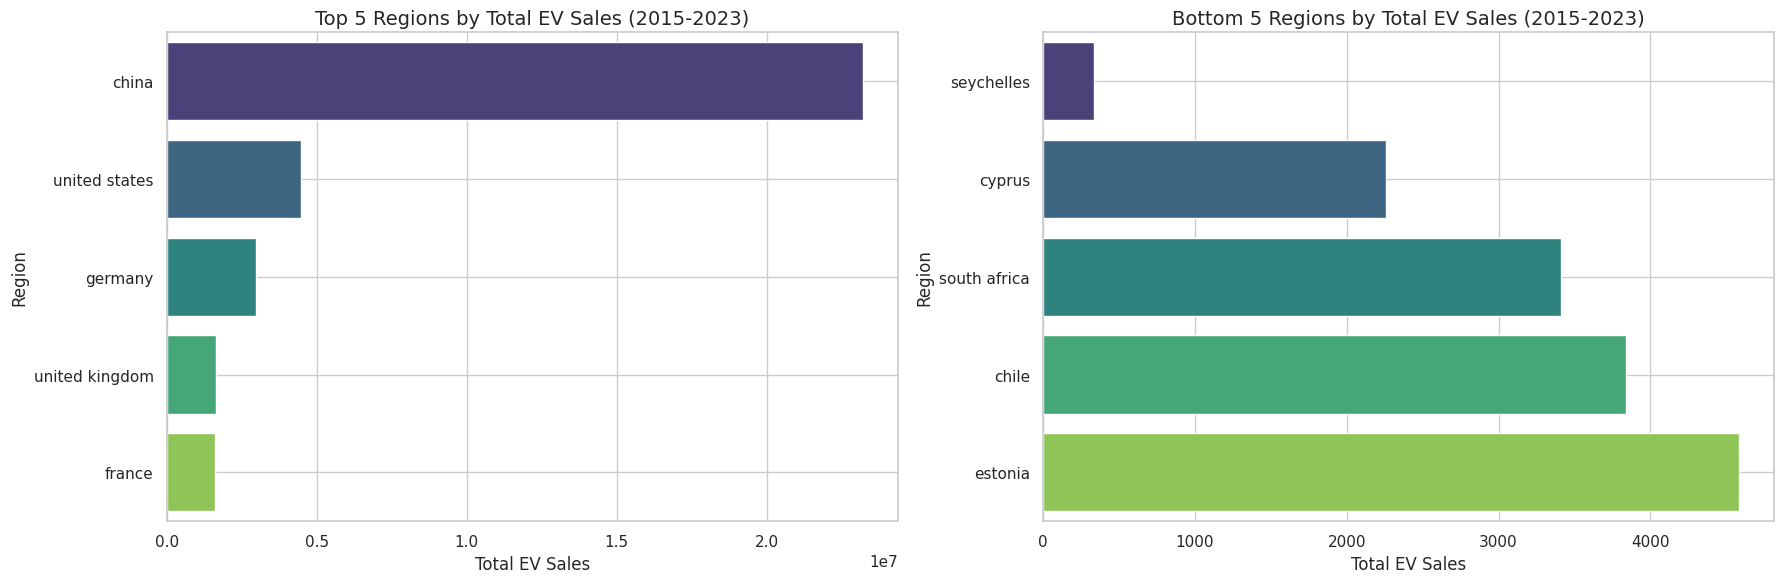

In [ ]:
excluded_regions = ['europe', 'european union', 'rest of the world']  # List of regions to exclude

# Filter out the excluded regions
historical_sales_filtered = ev_sales_hist[~ev_sales_hist['Region'].isin(excluded_regions)]

# Total EV sales by region
region_ev_sales = historical_sales_filtered.groupby('Region')['Value'].sum().reset_index()

# Top 5 regions by total EV sales
top_5_regions = region_ev_sales.sort_values(by='Value', ascending=False).head(5)

# Bottom 5 regions by total EV sales
bottom_5_regions = region_ev_sales.sort_values(by='Value', ascending=True).head(5)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Plot for Top 5 Regions
sns.barplot(data=top_5_regions, x='Value', y='Region', palette='viridis', ax=ax1)
ax1.set_title('Top 5 Regions by Total EV Sales (2015-2023)', fontsize=14)
ax1.set_xlabel('Total EV Sales', fontsize=12)
ax1.set_ylabel('Region', fontsize=12)
ax1.grid(True)

# Plot for Bottom 5 Regions
sns.barplot(data=bottom_5_regions, x='Value', y='Region', palette='viridis', ax=ax2)
ax2.set_title('Bottom 5 Regions by Total EV Sales (2015-2023)', fontsize=14)
ax2.set_xlabel('Total EV Sales', fontsize=12)
ax2.set_ylabel('Region', fontsize=12)
ax2.grid(True)


plt.tight_layout()
plt.show()


Powertrain Analysis
1. **EV Sales by Powertrain Type:** Comparing the total sales of BEVs (Battery Electric Vehicles) and PHEVs (Plug-in Hybrid Electric Vehicles).

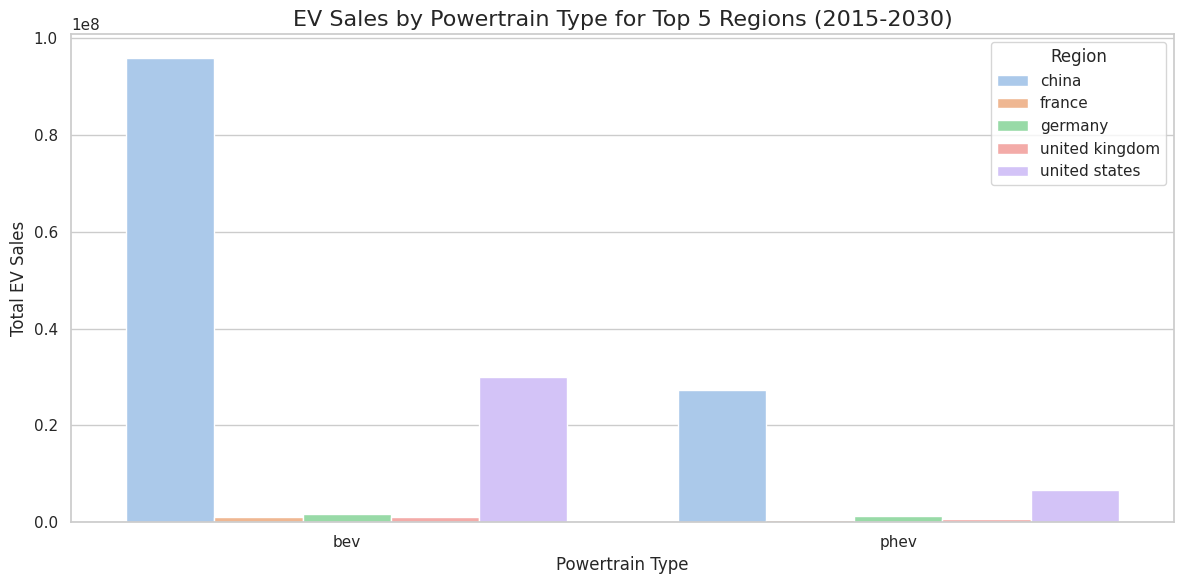

In [ ]:
# Total EV sales by region
region_ev_sales = historical_sales_filtered.groupby('Region')['Value'].sum().reset_index()

# Top 5 regions by total EV sales
top_5_regions = region_ev_sales.sort_values(by='Value', ascending=False).head(5)['Region']

# Filter EV sales for the top 5 regions
ev_sales_top_regions = ev_sales[ev_sales['Region'].isin(top_5_regions)]

# EV sales grouped by Powertrain and Region for the top regions
powertrain_sales_top_regions = ev_sales_top_regions.groupby(['Powertrain', 'Region'])['Value'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12,6))
sns.barplot(data=powertrain_sales_top_regions, x='Powertrain', y='Value', hue='Region', palette='pastel')

# Add title and labels
plt.title('EV Sales by Powertrain Type for Top 5 Regions (2015-2030)', fontsize=16)
plt.xlabel('Powertrain Type', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


The chart compares EV sales by powertrain type (BEV vs. PHEV) for the top 5 regions (China, United States, Germany, United Kingdom, and France) from 2015 to 2030. Here’s the breakdown:

For the Battery Electric Vehicles (BEV) Sales, China dominates BEV sales with nearly 100 million vehicles, showing that China is the global leader in fully electric vehicles. United States follows with a moderate level of BEV sales, around 30 million vehicles. Germany, United Kingdom, and France contribute relatively small portions to global BEV sales, each contributing less than 5 million BEVs. This suggests these European nations are increasing their EV adoption but at a slower pace compared to the U.S. and China.

Plug-in Hybrid Electric Vehicles (PHEV) Sales, here, China and the U.S. again dominate also, but the sales are much smaller compared to BEVs. Both countries have between 20 and 30 million PHEVs sold over the period.
Germany shows some PHEV sales, though at a much smaller scale than BEVs. Similarly, the United Kingdom and France contribute minimally to PHEV sales.

China’s focus on Battery Electric Vehicles (BEVs) is clear from the massive lead in BEV sales. This is likely driven by aggressive policy support and a robust domestic manufacturing ecosystem. U.S. shows a solid presence in both BEV and PHEV markets, though still far behind China.

European countries like Germany, the U.K., and France are contributing to both BEV and PHEV markets but at much lower levels compared to China and the U.S., reflecting slower adoption and possibly different consumer preferences or infrastructure readiness. The chart shows that BEVs are the clear focus in global EV adoption, with PHEVs playing a much smaller role in the transition.

In [ ]:
excluded_regions = ['europe', 'european union', 'rest of the world'] # List of regions to exclude

# Filter out the excluded regions
historical_sales_filtered = historical_sales[~historical_sales['Region'].isin(excluded_regions)]

# Global sales per year
global_sales_yearly = historical_sales_filtered.groupby('Year')['Value'].sum().reset_index().rename(columns={'Value': 'Global_Sales'})

# Merge with regional data
regional_sales = historical_sales_filtered.groupby(['Year', 'Region'])['Value'].sum().reset_index()
regional_sales = pd.merge(regional_sales, global_sales_yearly, on='Year')
regional_sales['Sales_Share'] = (regional_sales['Value'] / regional_sales['Global_Sales']) * 100

# Calculate Average Sales Share and Select Top/Bottom 10
avg_sales_share = regional_sales.groupby('Region')['Sales_Share'].mean().sort_values()
top_10_regions = avg_sales_share.tail(10).index
bottom_10_regions = avg_sales_share.head(10).index

# Filter Data for Top/Bottom 10 ---
top_10_sales_share = regional_sales[regional_sales['Region'].isin(top_10_regions)]
bottom_10_sales_share = regional_sales[regional_sales['Region'].isin(bottom_10_regions)]

# Pivot for plotting
top_10_sales_share_pivot = top_10_sales_share.pivot(index='Year', columns='Region', values='Sales_Share').fillna(0)
bottom_10_sales_share_pivot = bottom_10_sales_share.pivot(index='Year', columns='Region', values='Sales_Share').fillna(0)


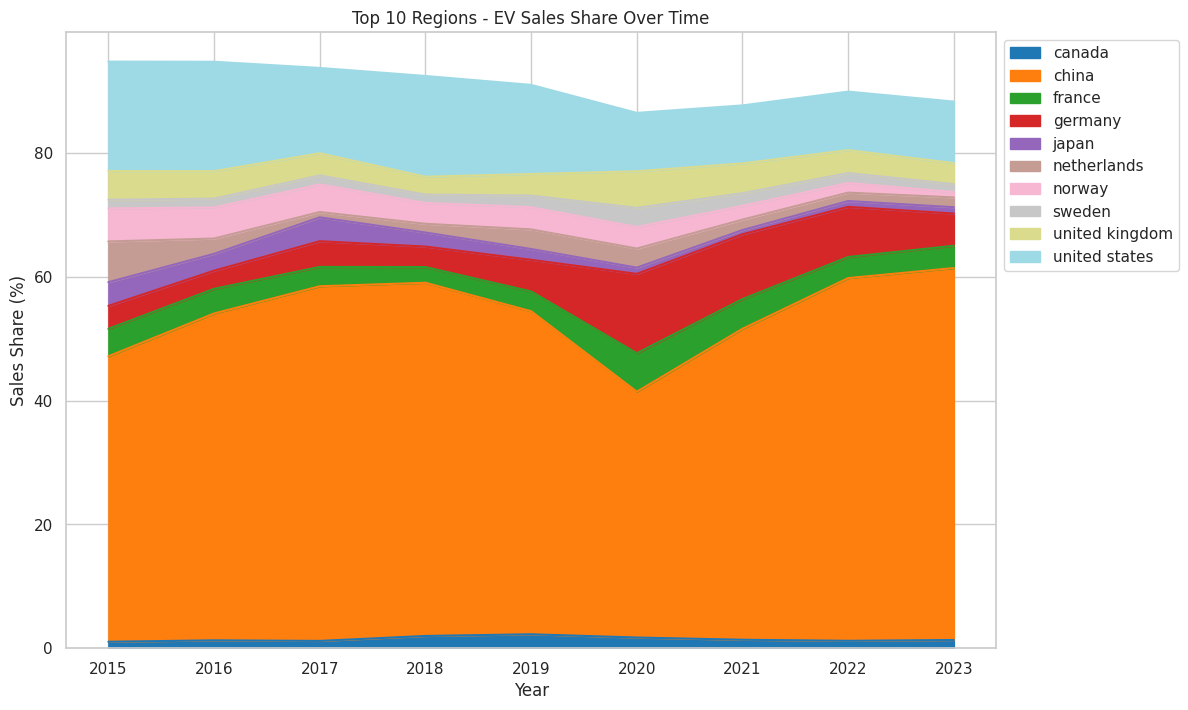

In [ ]:
# Plot Top 10
top_10_sales_share_pivot.plot(kind='area', stacked=True, figsize=(12,8), colormap='tab20')
plt.title('Top 10 Regions - EV Sales Share Over Time')
plt.xlabel('Year')
plt.ylabel('Sales Share (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

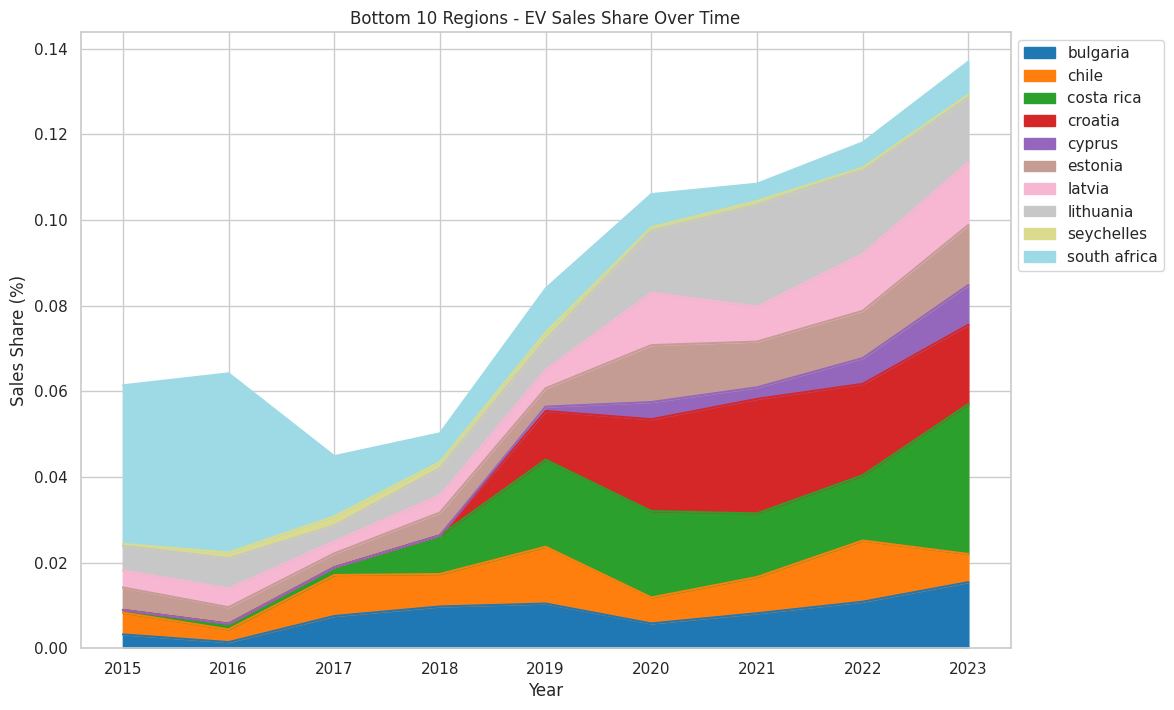

In [ ]:
# Plot Bottom 10
bottom_10_sales_share_pivot.plot(kind='area', stacked=True, figsize=(12,8), colormap='tab20')
plt.title('Bottom 10 Regions - EV Sales Share Over Time')
plt.xlabel('Year')
plt.ylabel('Sales Share (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


In [ ]:
# Filter for EV stock data
ev_stock = df_ev_data[df_ev_data['Parameter'] == 'ev stock']

# Exclude specific regions
excluded_regions = ['europe', 'european union', 'global']  # List of regions to exclude
historical_stock_filtered = ev_stock[~ev_stock['Region'].isin(excluded_regions)]

# Global stock per year
global_stock_yearly = historical_stock_filtered.groupby('Year')['Value'].sum().reset_index().rename(columns={'Value': 'Global_Stock'})

# Merge with regional data
regional_stock = historical_stock_filtered.groupby(['Year', 'Region'])['Value'].sum().reset_index()
regional_stock = pd.merge(regional_stock, global_stock_yearly, on='Year')
regional_stock['Stock_Share'] = (regional_stock['Value'] / regional_stock['Global_Stock']) * 100

# Calculate Average Stock Share and Select Top/Bottom 10
avg_stock_share = regional_stock.groupby('Region')['Stock_Share'].mean().sort_values()
top_10_regions = avg_stock_share.tail(10).index
bottom_10_regions = avg_stock_share.head(10).index

# Filter Data for Top/Bottom 10
top_10_stock_share = regional_stock[regional_stock['Region'].isin(top_10_regions)]
bottom_10_stock_share = regional_stock[regional_stock['Region'].isin(bottom_10_regions)]

# Pivot for plotting
top_10_stock_share_pivot = top_10_stock_share.pivot(index='Year', columns='Region', values='Stock_Share').fillna(0)
bottom_10_stock_share_pivot = bottom_10_stock_share.pivot(index='Year', columns='Region', values='Stock_Share').fillna(0)




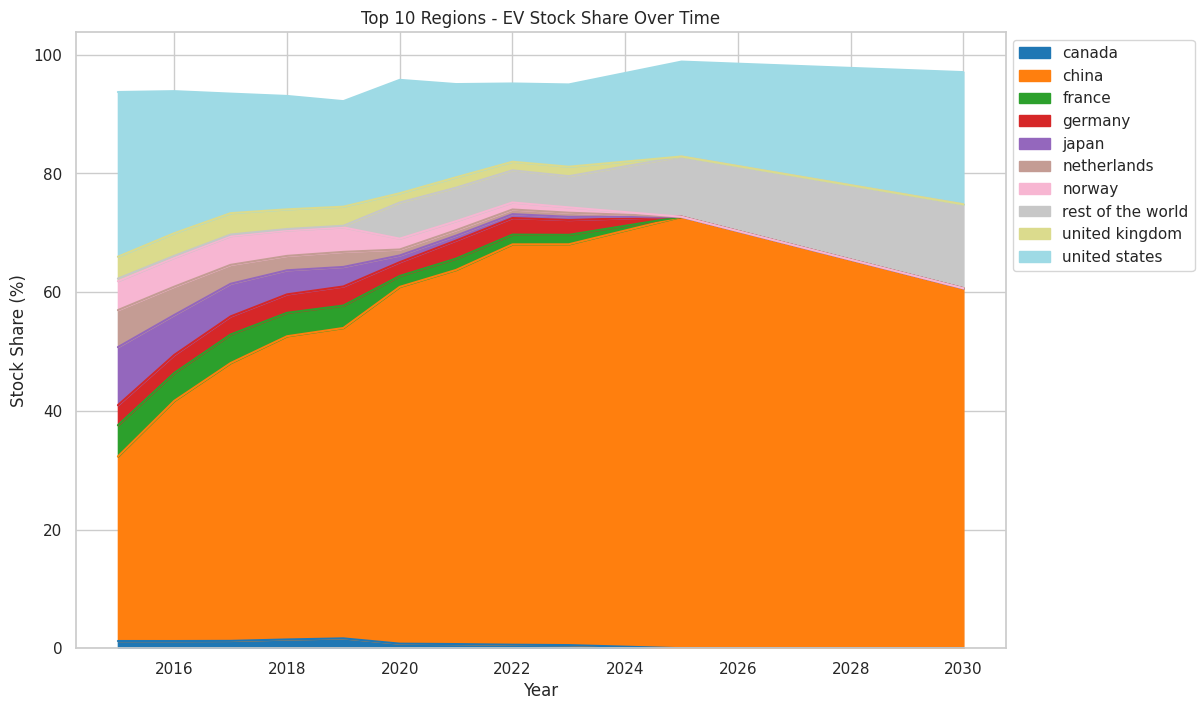

In [ ]:
# Plot Top 10 Regions
top_10_stock_share_pivot.plot(kind='area', stacked=True, figsize=(12,8), colormap='tab20')
plt.title('Top 10 Regions - EV Stock Share Over Time')
plt.xlabel('Year')
plt.ylabel('Stock Share (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()



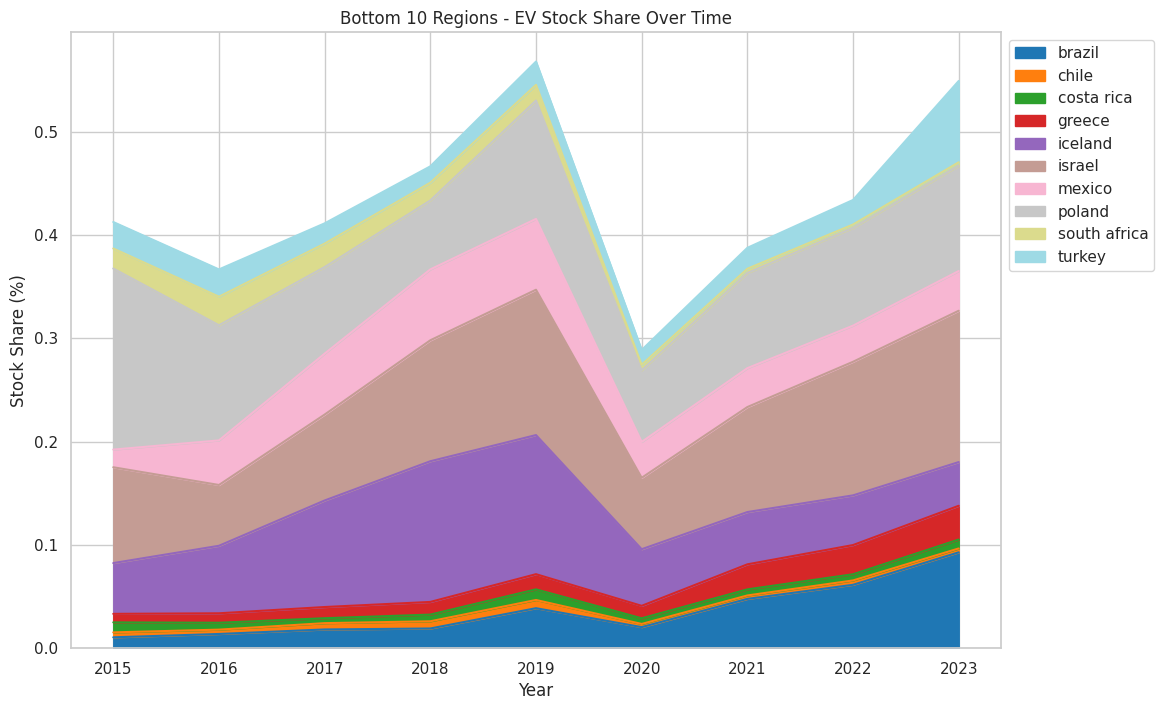

In [ ]:
# --- Plot Bottom 10 Regions ---
bottom_10_stock_share_pivot.plot(kind='area', stacked=True, figsize=(12,8), colormap='tab20')
plt.title('Bottom 10 Regions - EV Stock Share Over Time')
plt.xlabel('Year')
plt.ylabel('Stock Share (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

Now, we'll do some EDA on a filtered dataset for the regions China, United Kingdom, United States,Europe, European Union as they are looking to be as the highst adopters on Electric Vehicle

In [ ]:
# Filter the dataset for specific regions
selected_regions = ['china', 'united states', 'europe', 'european union', 'rest of the world']
df_filtered = df_ev_data[df_ev_data['Region'].isin(selected_regions)]
df_filtered = df_filtered.reset_index(drop=True)
# We check the first few rows to confirm filtering
df_filtered.head()

,Region,Category,Parameter,Mode,Powertrain,Year,Unit,Value
0,china,historical,ev stock,trucks,bev,2015,vehicles,17000.0
1,china,historical,ev stock,cars,phev,2015,vehicles,87000.0
2,china,historical,ev sales,trucks,bev,2015,vehicles,17000.0
3,china,historical,ev sales,cars,phev,2015,vehicles,61000.0
4,china,historical,ev stock,cars,bev,2015,vehicles,210000.0


In [ ]:
df_filtered['Region'] .value_counts()

,count
Region,
europe,334
china,321
rest of the world,271
united states,184
european union,142


In [ ]:
df_filtered['Year'] .value_counts()

,count
Year,
2021,177
2022,175
2020,173
2023,169
2025,128
2030,128
2019,65
2018,64
2017,60


Analyze EV Sales and Stock by Region and Year
1. EV Sales Over Time (by Region)

 - We will use Plotly to visualize the trend of EV sales in each region over time.

In [ ]:
# Filter for EV Sales parameter
df_ev_sales = df_filtered[df_filtered['Parameter'] == 'ev sales']
df_ev_sales_hist = df_ev_sales[df_ev_sales['Category'] == 'historical']

# Create a stacked bar chart using Plotly Express
fig_sales = px.bar(
    df_ev_sales_hist,
    x='Year',
    y='Value',
    color='Powertrain',       # Differentiate BEV and PHEV
    barmode='stack',          # Stack the bars
    facet_col='Region',       # Create a subplot for each region
    title='EV Sales over Time by Region and Powertrain (Stacked Bar Chart)',
    labels={'Value': 'EV Sales (vehicles)', 'Year': 'Year'},
    hover_data=['Mode', 'Region']
)

fig_sales.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of EV Sales',
    legend_title_text='Powertrain'
)
fig_sales.show()


The chart displays Electric Vehicle Sales over Time by Region and Powertrain using a stacked bar chart. Each subplot represents a different region (China, European Union, Europe, Rest of the World, and United States), and the bars are segmented by two powertrain types: Battery Electric Vehicles (BEVs) in blue and Plug-in Hybrid Electric Vehicles (PHEVs) in red.

China and the EU lead in overall EV sales, with a massive shift toward BEVs.
The U.S. follows closely behind with strong growth in the later years. The `Rest of the World` and non-EU Europe, have smaller but still noticeable growth, showing global momentum toward EV adoption.

In [ ]:
# Filter for EV Stock parameter
df_ev_stock = df_filtered[df_filtered['Parameter'] == 'ev stock']
df_ev_stock_hist = df_ev_stock[df_ev_stock['Category'] == 'historical']

# Create a stacked bar chart using Plotly Express
fig_stock = px.bar(
    df_ev_stock_hist,
    x='Year',
    y='Value',
    color='Powertrain',        # Differentiate BEV and PHEV
    barmode='stack',           # Stack the bars
    facet_col='Region',        # Create a subplot for each region
    title='EV Stock over Time by Region and Powertrain (Stacked Bar Chart)',
    labels={'Value': 'EV Stock (vehicles)', 'Year': 'Year'},
    hover_data=['Mode', 'Region']
)

fig_stock.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of EV Stock',
    legend_title_text='Powertrain'
)
fig_stock.show()



China is the clear leader in terms of total EV stock, far surpassing other regions, especially after 2020. The European Union also shows significant growth, driven primarily by BEVs. Non-EU Europe and the U.S. have lower, but still substantial, EV stock growth, with PHEVs playing a more significant role compared to China and the EU. The Rest of the World is slower in terms of total EV stock, but the growth is consistent, with a near-even balance between BEVs and PHEVs. The shift towards BEVs is evident in most regions, indicating that full electrification is becoming the dominant approach, while PHEVs still play an important transitional role in certain markets.
This chart shows the rising momentum of the EV market worldwide, with notable leadership from China and the EU, and a clear trend toward full battery electrification across most regions.

Now lets look at:
##### **Global EV Market Share by Manufacturers**


In [ ]:
# BEV & PHEV 2023 Sales Ranking and Market Share
# source = https://www.trendforce.com/presscenter/news/20240220-12030.html
bev_data = {
    'Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'BEV': ['Tesla', 'BYD', 'GAC Aion', 'SAIC-GM-Wuling', 'Volkswagen', 'BMW', 'Hyundai', 'Mercedes-Benz', 'MG', 'KIA'],
    'Market Share': [19.9, 17.1, 5.2, 4.9, 4.6, 3.6, 2.9, 2.6, 2.3, 2.0]
}

# Data for PHEV
phev_data = {
    'Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PHEV': ['BYD', 'Li Auto', 'BMW', 'Mercedes-Benz', 'Volvo Cars', 'Jeep', 'Changan', 'Denza', 'Deepal', 'Toyota'],
    'Market Share': [33.8, 9.6, 4.3, 3.9, 3.9, 3.1, 2.9, 2.8, 2.6, 2.6]
}

# Create DataFrames
df_bev = pd.DataFrame(bev_data)
df_phev = pd.DataFrame(phev_data)



In [ ]:
# Display the DataFrames
print("BEV Sales Ranking and Market Share:")
print(df_bev.to_markdown(index=False, numalign="left", stralign="left"))



BEV Sales Ranking and Market Share:
| Rank   | BEV            | Market Share   |
|:-------|:---------------|:---------------|
| 1      | Tesla          | 19.9           |
| 2      | BYD            | 17.1           |
| 3      | GAC Aion       | 5.2            |
| 4      | SAIC-GM-Wuling | 4.9            |
| 5      | Volkswagen     | 4.6            |
| 6      | BMW            | 3.6            |
| 7      | Hyundai        | 2.9            |
| 8      | Mercedes-Benz  | 2.6            |
| 9      | MG             | 2.3            |
| 10     | KIA            | 2              |


In [ ]:
print("\nPHEV Sales Ranking and Market Share:")
print(df_phev.to_markdown(index=False, numalign="left", stralign="left"))


PHEV Sales Ranking and Market Share:
| Rank   | PHEV          | Market Share   |
|:-------|:--------------|:---------------|
| 1      | BYD           | 33.8           |
| 2      | Li Auto       | 9.6            |
| 3      | BMW           | 4.3            |
| 4      | Mercedes-Benz | 3.9            |
| 5      | Volvo Cars    | 3.9            |
| 6      | Jeep          | 3.1            |
| 7      | Changan       | 2.9            |
| 8      | Denza         | 2.8            |
| 9      | Deepal        | 2.6            |
| 10     | Toyota        | 2.6            |


Top 10 Market Shares in Battery Electric Vehicle (BEV) and Plug-in Hybrid Electric Vehicle (PHEV) end of 2023. The two bar charts compare market shares across different manufacturers for both BEV and PHEV powertrains.

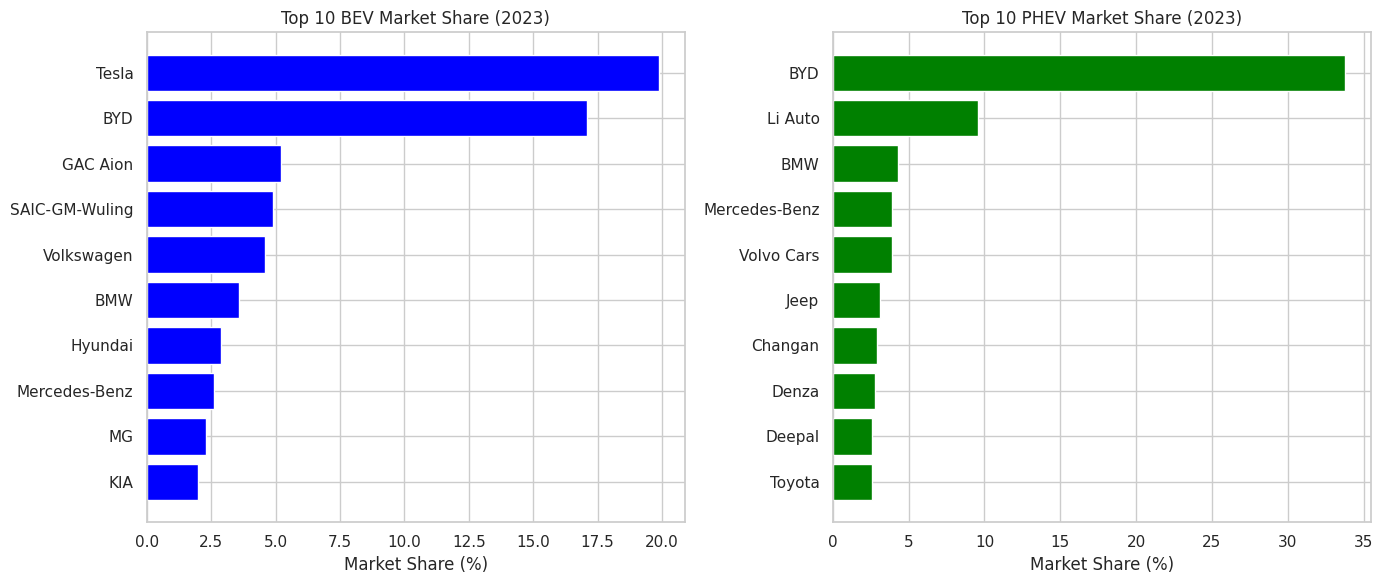

In [ ]:
# Plotting BEV and PHEV market shares
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# BEV Market Share Bar Plot
ax[0].barh(df_bev['BEV'], df_bev['Market Share'], color='blue')
ax[0].set_title('Top 10 BEV Market Share (2023)')
ax[0].set_xlabel('Market Share (%)')
ax[0].invert_yaxis()

# PHEV Market Share Bar Plot
ax[1].barh(df_phev['PHEV'], df_phev['Market Share'], color='green')
ax[1].set_title('Top 10 PHEV Market Share (2023)')
ax[1].set_xlabel('Market Share (%)')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

Left Chart, `Top 10 BEV Market Share (year end 2023)`, Tesla leads the BEV market with close to 19% market share, establishing itself as the largest player in the BEV space. BYD, a Chinese manufacturer, follows closely with a market share of about 15%. Other significant players include, GAC Aion, SAIC-GM-Wuling, Volkswagen, and BMW, each capturing between 3-6% of the global BEV market.Companies like Hyundai, Mercedes-Benz, MG, and KIA occupy smaller shares, ranging between 2-4%.

Right Chart, `Top 10 PHEV Market Share (year end 2023)`, BYD dominates the PHEV market, controlling a massive 35% of the market share, far ahead of any other manufacturer. This suggests that BYD is a major player not just in BEVs, but also in hybrid technologies. Li Auto, another Chinese manufacturer, follows with around 10% market share. Other key players in the PHEV market include, BMW, Mercedes-Benz, and Volvo Cars, with market shares between 5-7%.
Jeep, Changan, Denza, Deepal, and Toyota make up smaller portions of the market, with shares around 2-4%.


Tesla is the largest global BEV player, but it doesn't appear in the top 10 for PHEVs, suggesting that its focus is primarily on fully electric vehicles.
BYD stands out as a significant player in both BEV and PHEV markets, dominating the PHEV space and also capturing a large share in BEVs. This highlights BYD's comprehensive approach to the EV market by leveraging both powertrain technologies. European and U.S. automakers like BMW, Mercedes-Benz, and Volkswagen have a presence in both BEV and PHEV markets but are positioned lower in terms of market share compared to the leading Chinese players, especially in the PHEV market. The dominance of Chinese manufacturers (BYD, Li Auto, SAIC, GAC Aion) in both BEV and PHEV markets indicates/shows the rapid rise of China as a key player in the global EV industry. Overall, these charts reflect the global dynamics of the EV market in 2023, where Chinese manufacturers are leading in both BEV and PHEV segments, while traditional automakers still maintain a significant but smaller share in these emerging markets.

In [ ]:
# Global Electric Vehicle Market Share Sales by end of 2023
# source = https://www.visualcapitalist.com/global-ev-production-byd-surpasses-tesla/
# Data
data = {
    'Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Brand': ['Tesla', 'BYD', 'GAC Aion', 'SAIC-GM-Wuling', 'Volkswagen', 'BMW', 'Hyundai', 'Mercedes-Benz', 'MG', 'KIA'],
    'Country': ['US', 'China', 'China', 'China', 'Germany', 'Germany', 'S. Korea', 'Germany', 'China', 'S. Korea'],
    'Market Share in 2023': [19.9, 17.1, 5.2, 4.9, 4.6, 3.6, 2.9, 2.6, 2.3, 2.0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print("Global Electric Vehicle (EV) Sales Ranking and Market Share:")
print(df.to_markdown(index=False, numalign="left", stralign="left"))

Global Electric Vehicle (EV) Sales Ranking and Market Share:
| Rank   | Brand          | Country   | Market Share in 2023   |
|:-------|:---------------|:----------|:-----------------------|
| 1      | Tesla          | US        | 19.9                   |
| 2      | BYD            | China     | 17.1                   |
| 3      | GAC Aion       | China     | 5.2                    |
| 4      | SAIC-GM-Wuling | China     | 4.9                    |
| 5      | Volkswagen     | Germany   | 4.6                    |
| 6      | BMW            | Germany   | 3.6                    |
| 7      | Hyundai        | S. Korea  | 2.9                    |
| 8      | Mercedes-Benz  | Germany   | 2.6                    |
| 9      | MG             | China     | 2.3                    |
| 10     | KIA            | S. Korea  | 2                      |


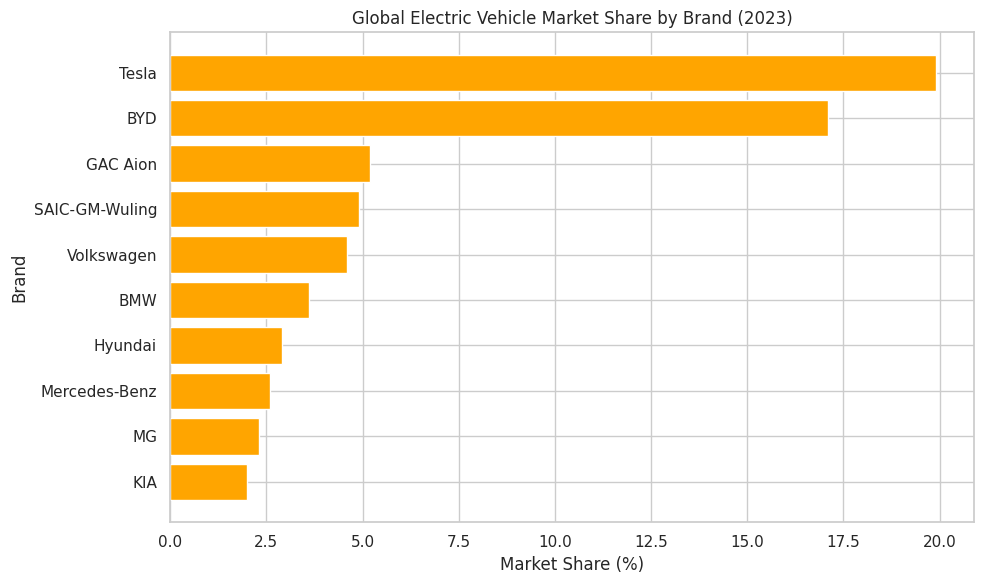

In [ ]:
# Plotting the Global EV Market Share by Brand (2023)

fig, ax = plt.subplots(figsize=(10, 6))

# Bar Plot for EV Market Share by Brand
ax.barh(df['Brand'], df['Market Share in 2023'], color='orange')
ax.set_title('Global Electric Vehicle Market Share by Brand (2023)')
ax.set_xlabel('Market Share (%)')
ax.set_ylabel('Brand')
ax.invert_yaxis()  # Invert y-axis to have the highest rank at the top

plt.tight_layout()
plt.show()

Tesla and BYD clearly dominate the global EV market, together accounting for over 30% of the total market share. Their leadership is probably attributed to a strong technological innovation, wide product portfolios, and scale. The strong presence of Chinese automakers like GAC Aion, SAIC-GM-Wuling, and BYD highlights China's critical role in the global EV market. Domestic demand, combined with government incentives and manufacturing capacity, is propelling these brands to the top of the global rankings. European automakers such as Volkswagen, BMW, and Mercedes-Benz are actively competing in the EV market, especially in Europe, but they face significant competition from Chinese and American manufacturers. KIA and MG, though occupying smaller shares, reflect the growing diversity in the EV market, with both budget and premium brands competing for market dominance. Overall, the chart reflects the competitive landscape of the global EV market, where Tesla and BYD are the dominant players, and several other manufacturers from both Asia and Europe are carving out significant market shares as they transition to electrified vehicles.

In [ ]:
# Global EV Production
# source: https://www.visualcapitalist.com/global-ev-production-byd-surpasses-tesla/
# Data
data = {
    'Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'Company': ['BYD', 'Tesla', 'VW Group', 'GM (incl. Wuling Motors)', 'Stellantis',
                'Hyundai Motors (incl. Kia)', 'BMW Group', 'Geely Auto Group', 'Mercedes-Benz Group',
                'Renault-Nissan-Mitsubishi Alliance', 'GAC Group', 'SAIC Motor Corp.', 'Volvo Cars',
                'Chery Auto Co.', 'Changan Auto Co.', 'Other (41 companies)'],
    '2022': [1858364, 1314319, 839207, 584602, 512276, 497816, 433164, 351356, 337364, 335964,
             287977, 256341, 253266, 253141, 245555, 1927211],
    '2021': [598019, 936247, 763851, 516631, 381843, 348660, 329182, 99980, 281929, 289473, 125384,
             237043, 220576, 107482, 105072, 1326262],
    'Growth from 2021': ['211%', '40%', '10%', '13%', '34%', '43%', '32%', '251%', '20%', '16%', '130%',
                         '8%', '15%', '136%', '134%', '45%']
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print("Global EV Production 2021 and 2022:")
print(df.to_markdown(index=False, numalign="left", stralign="left"))

Global EV Production 2021 and 2022:
| Rank   | Company                            | 2022    | 2021    | Growth from 2021   |
|:-------|:-----------------------------------|:--------|:--------|:-------------------|
| 1      | BYD                                | 1858364 | 598019  | 211%               |
| 2      | Tesla                              | 1314319 | 936247  | 40%                |
| 3      | VW Group                           | 839207  | 763851  | 10%                |
| 4      | GM (incl. Wuling Motors)           | 584602  | 516631  | 13%                |
| 5      | Stellantis                         | 512276  | 381843  | 34%                |
| 6      | Hyundai Motors (incl. Kia)         | 497816  | 348660  | 43%                |
| 7      | BMW Group                          | 433164  | 329182  | 32%                |
| 8      | Geely Auto Group                   | 351356  | 99980   | 251%               |
| 9      | Mercedes-Benz Group                | 337364  | 281929  | 20%   

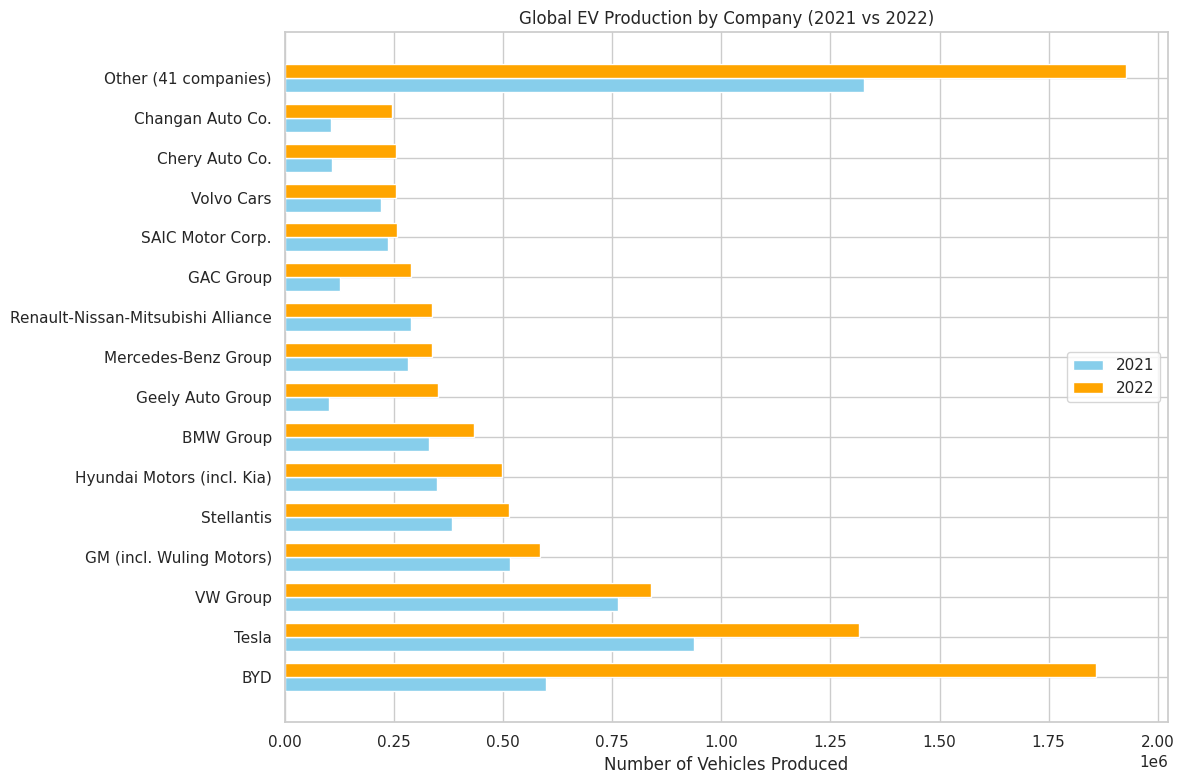

In [ ]:
# Plotting Global EV Production in 2021 & 2022 for Top Companies
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
index = range(len(df['Company']))

# Create bar chart for 2021 and 2022 EV production
bars_2021 = plt.barh(index, df['2021'], bar_width, label='2021', color='skyblue')
bars_2022 = plt.barh([i + bar_width for i in index], df['2022'], bar_width, label='2022', color='orange')

# Adding titles and labels
plt.xlabel('Number of Vehicles Produced')
plt.title('Global EV Production by Company (2021 vs 2022)')
plt.yticks([i + bar_width / 2 for i in index], df['Company'])
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

This bar chart shows Global EV Production by Manufacturer looking at the years 2021 (in light blue) and 2022 (in orange). Each bar represents the number of vehicles produced by various companies, including some groups like Stellantis and Renault-Nissan-Mitsubishi Alliance, as well as individual manufacturers such as Tesla and BYD.




BYD had a significant increase in production from 2021 to 2022, reaching nearly 1.75 million vehicles in 2022.
The growth from 2021 to 2022 is substantial, with production in 2022 being almost double that of 2021, showing the company’s aggressive scaling of EV production.

Tesla remains a major player, with production nearing 1.5 million vehicles in 2022, which is a sizable increase from its 2021 production.
While not growing as dramatically as BYD, Tesla’s consistent growth trajectory reflects its continued dominance in the global EV market.
Volkswagen (VW) Group:
VW also shows steady growth, with production numbers increasing from just over 500,000 in 2021 to nearly 1 million in 2022.
This increase highlights VW’s commitment to electrification and its expanding EV portfolio.

GM, including Wuling Motors, shows growth from about 500,000 in 2021 to nearly 750,000 vehicles in 2022.
The company’s efforts in the EV space, particularly through Wuling's low-cost EVs in China, are reflected in this steady rise.

Stellantis also increased its production, rising from about 500,000 in 2021 to over 750,000 in 2022, reflecting the group’s increased focus on EV models across its many brands.

Other Major Manufacturers, Hyundai Motors (including Kia), BMW Group, Renault-Nissan-Mitsubishi Alliance, Mercedes-Benz Group, and Geely Auto Group all show moderate increases in production from 2021 to 2022, with production ranging from 250,000 to 500,000 vehicles.
This indicates a broader trend of increasing EV production across the industry.

BYD and Tesla are clearly leading the EV production race, with both companies ramping up production significantly from 2021 to 2022.
Volkswagen Group, GM, and Stellantis are also catching up, with noticeable increases in production numbers.

Traditional automakers like BMW, Mercedes-Benz, and Renault-Nissan-Mitsubishi are making strides in EV production, but their growth rates are more moderate compared to the leaders.

The broader industry shows an upward trend in EV production across nearly all manufacturers, reflecting the increasing demand for electric vehicles globally and the shift in the automotive industry towards electrification.


Some major US Manufacturers where missing in the above analysis examining global market. so lets take a closer look at the US Electric Vehicle  market. \


### **Electric Vehicle Market Share and Sales**

In [ ]:
# Take a look at the growth in EV market share from 2022 through 2024
# Source =  https://caredge.com/guides/electric-vehicle-market-share-and-sales

import pandas as pd

# Data
data = {
    '': ['Battery Electric Vehicles (BEV)', 'Electrified (Hybrid + PHEV + BEV)'],
    'Q1 2022': [5.3, 12.4],
    'Q2 2022': [5.6, 12.6],
    'Q3 2022': [6.1, 12.1],
    'Q4 2022': [6.5, 13.0],
    'Q1 2023': [7.3, 14.5],
    'Q2 2023': [7.2, 16.0],
    'Q3 2023': [7.9, 17.7],
    'Q4 2023': [8.1, 16.0],
    'Q1 2024': [7.3, None],
    'Q2 2024': [8.0, None]

}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print("Market Share of Electrified Vehicles:")
print(df.to_markdown(index=False, numalign="left", stralign="left"))

Market Share of Electrified Vehicles:
|                                   | Q1 2022   | Q2 2022   | Q3 2022   | Q4 2022   | Q1 2023   | Q2 2023   | Q3 2023   | Q4 2023   | Q1 2024   | Q2 2024   |
|:----------------------------------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|
| Battery Electric Vehicles (BEV)   | 5.3       | 5.6       | 6.1       | 6.5       | 7.3       | 7.2       | 7.9       | 8.1       | 7.3       | 8         |
| Electrified (Hybrid + PHEV + BEV) | 12.4      | 12.6      | 12.1      | 13        | 14.5      | 16        | 17.7      | 16        | nan       | nan       |


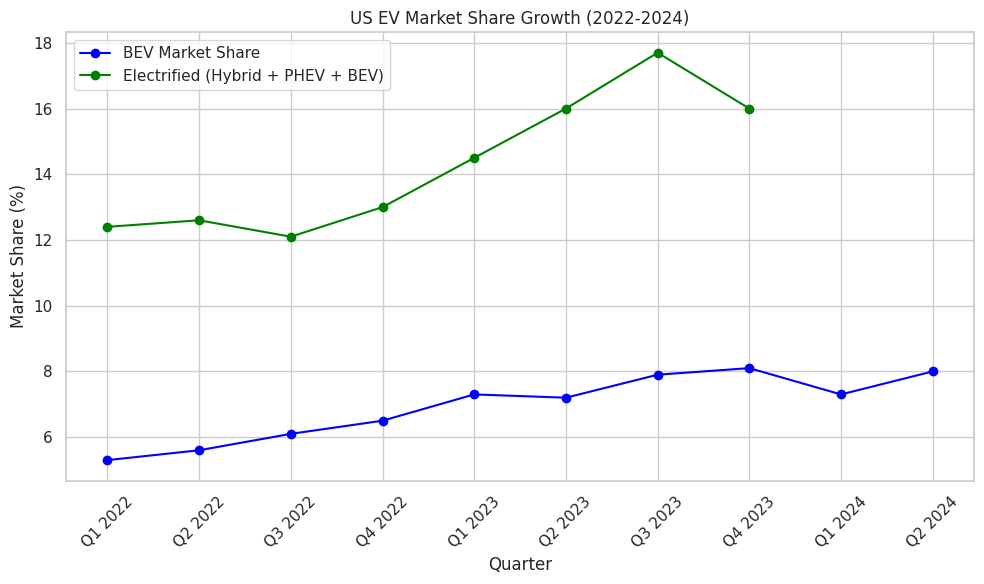

In [ ]:
# Plotting the US EV market share growth from 2022 through 2024

# Extract the BEV and Electrified vehicle data
quarters = ['Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022', 'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023', 'Q1 2024', 'Q2 2024']
bev_market_share = df.iloc[0, 1:].values
electrified_market_share = df.iloc[1, 1:].values

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot BEV market share
ax.plot(quarters, bev_market_share, marker='o', label='BEV Market Share', color='blue')

# Plot Electrified (Hybrid + PHEV + BEV) market share
ax.plot(quarters, electrified_market_share, marker='o', label='Electrified (Hybrid + PHEV + BEV)', color='green')

# Adding titles and labels
ax.set_title('US EV Market Share Growth (2022-2024)')
ax.set_xlabel('Quarter')
ax.set_ylabel('Market Share (%)')
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# US EV Market Share by Sales
# Source
updated_data = {
    'Automaker': [
        'Tesla', 'Ford Motor Company', 'General Motors', 'Nissan', 'Volkswagen Group',
        'Hyundai Group (incl. Kia)', 'Subaru', 'Toyota Motor N.A.', 'Mercedes-Benz',
        'Mazda', 'BMW', 'Jaguar', 'Stellantis', 'Volvo-Polestar', 'Rivian', 'Lucid',
        'Vinfast', 'Fisker', 'TOTAL US EV sales'
    ],
    'Q1 2022': [
        129743, 6734, 457, 4371, 7932, 15480, 0, 0, 2091, 0, 1171, 0, 0, 3092, 1227,
        460, None, None, 173561
    ],
    'Q2 2022': [
        130047, 15273, 7217, 3251, 8961, 17979, 0, 0, 1959, 0, 1082, 114, 0, 4518, 4467,
        482, None, None, 196788
    ],
    'Q3 2022': [
        114000, 18257, 15156, 1276, 11893, 9796, 0, 240, 2717, 0, 4337, 0, 0, 3510,
        6584, 1398, None, None, 188924
    ],
    'Q4 2022': [
        131574, 20339, 16150, 3308, 15193, 9641, 919, 985, 5656, 324, 7099, 298, 0, 5616,
        8054, 1060, None, None, 226789
    ],
    'Q1 2023': [
        161630, 10866, 20670, 5214, 15723, 14346, 1359, 1840, 5053, 15, 6585, 8, 0, 5228,
        7946, 1368, 110, None, 258882
    ],
    'Q2 2023': [
        175262, 14843, 15652, 4215, 13977, 21696, 1613, 2893, 9029, 51, 11990, 80, 0, 7608,
        12640, 1659, 740, None, 295355
    ],
    'Q3 2023': [
        156621, 20962, 20057, 6074, 20295, 30757, 2791, 4221, 10423, 34, 13594, 86, 0, 7797,
        15564, 1618, 1159, 997, 313086
    ],
    'Q4 2023': [
        161375, 25937, 19469, 5113, 20403, 25447, 3109, 5718, 10767, 0, 15364, 78, 0, 6531,
        13553, 1512, 1120, 1672, 317168
    ],
    'Q1 2024': [
        140187, 20223, 16969, 5284, 13806, 22936, 1147, 3500, 12250, 0, 11455, 256, 0, 3279,
        13588, 1967, 927, 1660, 268909
    ],
    'Q2 2024': [
        164264, 23957, 21930, 7128, 11904, 37044, 4238, 11607, 9270, 0, 14081, 1188, 0, 2285,
        13790, 1855, 1225, 2127, 330463
    ]
}

# Convert the updated dictionary to a pandas DataFrame
df = pd.DataFrame(updated_data)


# Display the DataFrame
print("US EV Sales by Automaker and Quarter:")
print(df.to_markdown(index=False, numalign="left", stralign="left"))

US EV Sales by Automaker and Quarter:
| Automaker                 | Q1 2022   | Q2 2022   | Q3 2022   | Q4 2022   | Q1 2023   | Q2 2023   | Q3 2023   | Q4 2023   | Q1 2024   | Q2 2024   |
|:--------------------------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|
| Tesla                     | 129743    | 130047    | 114000    | 131574    | 161630    | 175262    | 156621    | 161375    | 140187    | 164264    |
| Ford Motor Company        | 6734      | 15273     | 18257     | 20339     | 10866     | 14843     | 20962     | 25937     | 20223     | 23957     |
| General Motors            | 457       | 7217      | 15156     | 16150     | 20670     | 15652     | 20057     | 19469     | 16969     | 21930     |
| Nissan                    | 4371      | 3251      | 1276      | 3308      | 5214      | 4215      | 6074      | 5113      | 5284      | 7128      |
| Volkswagen Group          | 7932      | 8961      | 11893   

In [ ]:
import plotly.graph_objects as go

# Prepare traces for each automaker
fig = go.Figure()

for automaker in df['Automaker'][:-1]:  # Excluding 'TOTAL US EV sales'
    fig.add_trace(go.Scatter(
        x=df.columns[1:],
        y=df[df['Automaker'] == automaker].values[0][1:],
        mode='lines+markers',
        name=automaker
    ))

# Update layout
fig.update_layout(
    title="US EV Sales Trends by Automaker (2022-2024)",
    xaxis_title="Quarters",
    yaxis_title="Number of EV Sales",
    legend_title="Automaker",
    hovermode="x unified"
)

# Show the plot
fig.show()


Tesla has consistently been the leader in EV sales. Although its sales dipped slightly in Q3 2022 and again in Q1 2024, it maintains a high and stable trend overall, peaking around Q2 2023.
Hyundai Group (incl. Kia) shows a sharp increase in sales starting from Q1 2023, reaching a significant peak in Q2 2024. It has one of the steepest upward trends among all automakers, indicating a growing presence in the EV market. Ford's sales have fluctuated, showing a substantial growth trend between Q4 2022 and Q2 2023, but stabilizing in 2024. The company is still a strong player in the market after Tesla and Hyundai Group. Volkswagen has a relatively steady performance, although its sales started to drop after Q4 2023, indicating either saturation or challenges in maintaining growth. General Motors, Nissan, Mercedes-Benz, and BMW exhibit gradual sales increases over the period but remain lower in comparison to Tesla, Ford, and Hyundai.
Volvo-Polestar and Rivian show moderate growth with Rivian having a stronger trend. Newer or smaller players like Lucid, Vinfast, and Fisker remain low in terms of sales volumes. Automakers like Mazda and Jaguar show minimal activity, suggesting either a limited presence in the EV space or challenges in ramping up EV production.

Tesla continues to dominate, although growth appears to have plateaued somewhat compared to its sharp growth in previous quarters. Hyundai Group is emerging as a strong contender, showing aggressive growth in 2023 and 2024.
Ford also shows strong improvements, likely due to strategic investments in EV production. Volkswagen seems to have reached a peak and is now declining slightly in recent quarters, which could be related to market competition or supply chain challenges. The EV market is clearly expanding, as evidenced by the overall increase in total sales across automakers from Q1 2022 to Q2 2024.



In [ ]:
import pandas as pd

# EV Market Share by Brand data
# source = https://caredge.com/guides/electric-vehicle-market-share-and-sales
data = {
    'Automaker': [
        'Tesla*', 'Ford', 'General Motors', 'Nissan', 'Volkswagen Group',
        'Hyundai Motor Group (incl. Kia)', 'Mercedes-Benz', 'Mazda',
        'Toyota Motor N.A.', 'Subaru', 'BMW', 'Stellantis', 'Jaguar',
        'Rivian', 'Lucid', 'Vinfast', 'Volvo/Polestar'
    ],
    'Q1 2022': [74.8, 4.4, 0.3, 2.5, 4.6, 8.9, 1.2, 0.1, 0.0, 0.0, 0.7, 0.0, 0.1, 0.7, 0.3, 0.0, 1.9],
    'Q2 2022': [66.1, 7.8, 3.7, 1.7, 4.6, 9.1, 1.0, 0.1, 0.0, 0.0, 0.5, 0.0, 0.1, 2.3, 0.2, 0.0, 2.3],
    'Q3 2022': [60.3, 9.7, 8.0, 0.7, 6.3, 5.2, 1.4, 0.0, 0.0, 0.0, 2.3, 0.0, 0.0, 3.5, 0.7, 0.0, 1.9],
    'Q4 2022': [58.0, 9.0, 7.2, 1.5, 6.7, 4.3, 2.5, 0.0, 0.4, 0.4, 3.1, 0.0, 0.0, 3.1, 0.5, 0.0, 1.6],
    'Q1 2023': [62.4, 4.2, 8.0, 2.0, 6.1, 5.6, 2.0, 0.0, 0.7, 0.5, 2.5, 0.0, 0.0, 3.1, 0.5, 0.0, 2.0],
    'Q2 2023': [59.3, 5.0, 5.3, 1.4, 4.8, 7.3, 3.1, 0.0, 1.0, 0.5, 3.9, 0.0, 0.0, 4.3, 0.6, 0.3, 2.6],
    'Q3 2023': [50.0, 6.7, 6.1, 1.9, 6.5, 9.9, 3.3, 0.0, 1.3, 0.9, 4.2, 0.0, 0.0, 5.0, 0.5, 0.4, 2.5],
    'Q4 2023': [50.9, 8.2, 6.1, 1.6, 6.4, 8.0, 3.4, 0.0, 1.8, 1.0, 4.8, 0.0, 0.0, 4.3, 0.5, 0.4, 2.1],
    'Q1 2024': [52.1, 7.5, 6.0, 2.0, 5.1, 8.5, 4.6, 0.0, 1.3, 0.4, 4.3, 0.0, 0.0, 5.1, 0.7, 0.3, 1.2],
    'Q2 2024': [49.7, 7.2, 6.6, 2.2, 3.6, 11.2, 2.8, 0.0, 3.5, 1.3, 4.3, 0.0, 0.4, 4.2, 0.6, 0.3, 0.7]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)
# Display the DataFrame
print("EV Market Share by Automaker and Quarter:")
print(df.to_markdown(index=False, numalign="left", stralign="left"))

EV Market Share by Automaker and Quarter:
| Automaker                       | Q1 2022   | Q2 2022   | Q3 2022   | Q4 2022   | Q1 2023   | Q2 2023   | Q3 2023   | Q4 2023   | Q1 2024   | Q2 2024   |
|:--------------------------------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|
| Tesla*                          | 74.8      | 66.1      | 60.3      | 58        | 62.4      | 59.3      | 50        | 50.9      | 52.1      | 49.7      |
| Ford                            | 4.4       | 7.8       | 9.7       | 9         | 4.2       | 5         | 6.7       | 8.2       | 7.5       | 7.2       |
| General Motors                  | 0.3       | 3.7       | 8         | 7.2       | 8         | 5.3       | 6.1       | 6.1       | 6         | 6.6       |
| Nissan                          | 2.5       | 1.7       | 0.7       | 1.5       | 2         | 1.4       | 1.9       | 1.6       | 2         | 2.2       |
| Volkswagen Group    

In [ ]:
# Prepare traces for each automaker's market share
fig = go.Figure()

for automaker in df['Automaker']:
    fig.add_trace(go.Scatter(
        x=df.columns[1:],  # Quarters
        y=df[df['Automaker'] == automaker].values[0][1:],  # Market share values
        mode='lines+markers',
        name=automaker
    ))

# Update layout
fig.update_layout(
    title="US EV Market Share by Automaker (2022-2024)",
    xaxis_title="Quarters",
    yaxis_title="Market Share (%)",
    legend_title="Automaker",
    hovermode="x unified"
)

# Show the plot
fig.show()



Tesla has maintained a dominant market share, but there is a noticeable decline from around 75% in Q1 2022 to just under 50% in Q2 2024. This trend indicates that while Tesla is still the market leader, competitors are slowly gaining ground. The steep decline suggests increasing competition and diversification in the EV market. Ford’s market share started relatively low but grew steadily from Q1 2022 to Q2 2024. It shows some fluctuations but holds a consistent upward trend, reaching around 7% by Q2 2024. Ford’s ability to increase its market share indicates its growing influence in the EV market. Hyundai Motor Group (incl. Kia) demonstrates strong growth in market share, especially after Q3 2023, where it rapidly increases its share from around 5-6% to over 11% by Q2 2024. This rapid expansion indicates Hyundai’s aggressive push into the EV market, with strong results. GM’s market share rose from almost negligible in early 2022 to stabilize around 6-7% in 2024. The steady growth highlights GM's increasing focus on EV production.

Mercedes-Benz, BMW, and Rivian, these three automakers have shown consistent but relatively moderate growth in their market share. Mercedes-Benz grows from 1% to 4.6% in Q1 2024 but drops slightly in Q2 2024. BMW follows a similar trajectory, reaching 4.3% by Q2 2024. Rivian shows steady growth, peaking around 5.1% in Q1 2024, indicating increasing market penetration.

Subaru, Toyota, and Jaguar have very low market shares, with Toyota seeing some growth but still remaining minor players in the overall market. Lucid, Vinfast, and Volvo/Polestar maintain small market shares below 2%, showing limited impact on the overall market.



Before we go down further into the US EV market, lets look the supply chain

##### **Global Supply Chains of EV**

In [ ]:
# The geographical distribution of the global EV battery supply chain
# source = https://iea.blob.core.windows.net/assets/4eb8c252-76b1-4710-8f5e-867e751c8dda/GlobalSupplyChainsofEVBatteries.pdf
data = {
    'Category': ['Li Mining', 'Ni Mining', 'Co Mining', 'Gr Mining',
                 'Li Processing', 'Ni Processing', 'Co Processing', 'Gr Processing',
                 'Cathode Components', 'Anode Components',
                 'Battery Cells', 'EV Production'],
    'China': [50, 10, 0, 80,
              60, 45, 72, 90,
              65, 80, 75, 55],
    'Europe': [5, 0, 0, 0,
               10, 5, 0, 0,
               10, 5, 5, 10],
    'United States': [1, 5, 0, 0,
                      5, 5, 0, 0,
                      10, 5, 10, 20],
    'Japan': [0, 0, 0, 0,
              5, 5, 0, 0,
              10, 5, 5, 0],
    'Korea': [0, 0, 0, 0,
              5, 5, 5, 0,
              10, 5, 5, 0],
    'DRC': [0, 0, 70, 0,
            0, 0, 0, 0,
            0, 0, 0, 0],
    'Australia': [25, 40, 0, 0,
                  10, 5, 0, 0,
                  0, 0, 0, 0],
    'Indonesia': [0, 30, 0, 0,
                  0, 0, 0, 0,
                  0, 0, 0, 0],
    'Russia': [0, 0, 0, 0,
               0, 10, 10, 0,
               0, 0, 0, 0],
    'Other': [19, 10, 30, 20,
              10, 20, 13, 10,
              5, 5, 5, 15]
}

# Create the DataFrame
ev_battery_supply_df = pd.DataFrame(data)

# Display the DataFrame
print("EV Market Share by Automaker and Quarter:")
print(ev_battery_supply_df.to_markdown(index=False, numalign="left", stralign="left"))


EV Market Share by Automaker and Quarter:
| Category           | China   | Europe   | United States   | Japan   | Korea   | DRC   | Australia   | Indonesia   | Russia   | Other   |
|:-------------------|:--------|:---------|:----------------|:--------|:--------|:------|:------------|:------------|:---------|:--------|
| Li Mining          | 50      | 5        | 1               | 0       | 0       | 0     | 25          | 0           | 0        | 19      |
| Ni Mining          | 10      | 0        | 5               | 0       | 0       | 0     | 40          | 30          | 0        | 10      |
| Co Mining          | 0       | 0        | 0               | 0       | 0       | 70    | 0           | 0           | 0        | 30      |
| Gr Mining          | 80      | 0        | 0               | 0       | 0       | 0     | 0           | 0           | 0        | 20      |
| Li Processing      | 60      | 10       | 5               | 5       | 5       | 0     | 10          | 0           | 0     

In [ ]:
import plotly.express as px

# Create a stacked bar chart to visualize the global EV battery supply chain
fig = px.bar(ev_battery_supply_df,
             x='Category',
             y=['China', 'Europe', 'United States', 'Japan', 'Korea', 'DRC', 'Australia', 'Indonesia', 'Russia', 'Other'],
             title="Global EV Battery Supply Chain Distribution by Region",
             labels={'value': 'Percentage (%)', 'variable': 'Region'},
             barmode='stack')

# Update layout for better readability
fig.update_layout(
    xaxis_title="Supply Chain Category",
    yaxis_title="Percentage of Contribution",
    legend_title="Region",
    hovermode="x unified"
)

# Show the figure
fig.show()



The chart shows China’s Dominance across almost all supply chain categories (Mining, Material Processing, Cell Components, Battery Cells, and EV Production). China has the largest share, particularly in material processing, battery cells, and cell component manufacturing. Material processing shows a notable dominance of China handling between 60%–90% of the global supply for Lithium, Nickel, Cobalt, and Graphite processing.
In Battery cells and EV production, China holds around 75% and 55% of the global share, respectively, indicating its strong role in both production and assembly. Australia has a significant presence in Nickel mining (40%) and Lithium mining (25%), emphasizing its importance as a major player in raw material extraction, especially for lithium which is a key component of EV batteries.

The DRC’s Dominance in Cobalt Mining being responsible for 70% of global cobalt mining, which is critical for battery production. However, its role is limited to this specific area, with little to no presence in other stages of the supply chain like processing or component production.

The United States and Europe have relatively smaller shares in the EV battery supply chain. The U.S. holds about 10%-20% in EV production and material processing but does not dominate any specific stage. Europe plays a minor role, especially in EV production (around 10%) and cathode and anode components (5%-10%), but has no significant influence in the upstream stages of mining and material processing.

Korea and Japan play specialized roles in cell components manufacturing, particularly in cathode and anode production, where they hold around 10%-15% each. Their presence indicates a focus on midstream activities (component manufacturing) rather than raw material extraction or processing.

Indonesia is involved mainly in Nickel mining (around 30%), which aligns with its natural resources, but it does not extend its presence to other stages of the supply chain. Russia contributes marginally, mostly in Nickel processing (~10%), with no significant influence in other stages.

The overwhelming dominance of China in almost every step of the EV battery supply chain highlights a potential geopolitical risk. Any disruptions in China's ability to process materials or produce batteries could have a cascading effect on global EV production. The U.S. and Europe might need to invest in either raw material extraction, processing infrastructure, or scaling up their EV production capabilities to reduce dependence on China. Lastly countries like the DRC and Australia are critical for raw material supply, especially for cobalt and lithium, but face challenges in sustainability, ethical mining practices, and geopolitical stability.
